<a href="https://colab.research.google.com/github/qingxiam/DHUpredET-DHU-prediction/blob/test/Code%20of%20%20DHU%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import shutil, os

candidates = [
    "/root/.cache/huggingface/hub/models--zhihan1996--DNABERT-2-117M",
    "/root/.cache/huggingface/modules/transformers_modules/zhihan1996/DNABERT-2-117M",
    "/root/.cache/huggingface/modules/transformers_modules/zhihan1996--DNABERT-2-117M",
    "/root/.cache/torch/transformers/zhihan1996/DNABERT-2-117M",
    os.path.expanduser("~/.cache/huggingface/hub/models--zhihan1996--DNABERT-2-117M"),
]
for d in candidates:
    if os.path.exists(d):
        print(f"Removing cache: {d}")
        shutil.rmtree(d)
print("All DNABERT-2-117M cache cleared.")

Removing cache: /root/.cache/huggingface/hub/models--zhihan1996--DNABERT-2-117M
Removing cache: /root/.cache/huggingface/modules/transformers_modules/zhihan1996/DNABERT-2-117M
All DNABERT-2-117M cache cleared.


In [3]:
!pip install --upgrade "transformers>=4.41.2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 95.0 MB/s  0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.2
    Uninstalling transformers-4.55.2:
      Successfully uninstalled transformers-4.55.2


In [4]:
from transformers import AutoTokenizer, AutoModel
import torch

model_name = "zhihan1996/DNABERT-2-117M"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tok_bert = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
mod_bert = AutoModel.from_pretrained(model_name, trust_remote_code=True).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

configuration_bert.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- configuration_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


bert_layers.py: 0.00B [00:00, ?B/s]

flash_attn_triton.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- flash_attn_triton.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


bert_padding.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- bert_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/zhihan1996/DNABERT-2-117M:
- bert_layers.py
- flash_attn_triton.py
- bert_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/468M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/468M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at zhihan1996/DNABERT-2-117M and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
!pip install -q transformers

In [6]:
!pip install -q -U pip transformers

In [7]:
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("zhihan1996/DNABERT-2-117M", trust_remote_code=True)
model = AutoModel.from_pretrained("zhihan1996/DNABERT-2-117M", trust_remote_code=True)


Some weights of BertModel were not initialized from the model checkpoint at zhihan1996/DNABERT-2-117M and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
import os
from typing import List, Tuple

import numpy as np
import pandas as pd

# 配置：按需修改你的数据根目录
BASE_DIR = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"
TRAIN_POS = os.path.join(BASE_DIR, "train_pos_modified.fasta")
TRAIN_NEG = os.path.join(BASE_DIR, "train_neg_modified.fasta")
TEST_POS  = os.path.join(BASE_DIR, "test_pos_modified.fasta")
TEST_NEG  = os.path.join(BASE_DIR, "test_neg_modified.fasta")

OUT_TRAIN = os.path.join(BASE_DIR, "train_nt.csv")
OUT_TEST  = os.path.join(BASE_DIR, "test_nt.csv")

# 推荐模型（无自定义内核，CPU 即可稳定运行）
CANDIDATE_MODELS = [
    "InstaDeepAI/nucleotide-transformer-500m-human-ref",
    "InstaDeepAI/nucleotide-transformer-500m-1000g",
]

DEVICE = "cpu"      # 固定 CPU，稳定可靠
BATCH_SIZE = 16
MAX_LENGTH = 512    # 按需调整
POOLING = "mean"    # "mean" 或 "cls"

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def ensure_transformers():
    try:
        import transformers  # noqa
    except Exception:
        info("安装 transformers ...")
        os.system("pip install -q transformers")
        info("transformers 安装完成。")

def read_fasta_sequences(path: str) -> List[str]:
    seqs = []
    if not os.path.exists(path):
        warn(f"FASTA 不存在: {path}")
        return seqs
    with open(path, "r") as f:
        buf = []
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith(">"):
                if buf:
                    seqs.append("".join(buf))
                    buf = []
            else:
                buf.append(line)
        if buf:
            seqs.append("".join(buf))
    return seqs

def load_nt_model() -> Tuple[object, object, str, int]:
    ensure_transformers()
    from transformers import AutoTokenizer, AutoModel
    for mid in CANDIDATE_MODELS:
        try:
            info(f"尝试加载模型: {mid}")
            tok = AutoTokenizer.from_pretrained(mid)
            mdl = AutoModel.from_pretrained(mid)
            hid = mdl.config.hidden_size
            info(f"加载成功: {mid} (hidden_size={hid})")
            return tok, mdl, mid, hid
        except Exception as e:
            warn(f"{mid} 加载失败：{e}")
    raise RuntimeError("所有候选 Nucleotide Transformer 模型均无法加载。")

def embed(seqs: List[str], tok, mdl, pooling: str, max_length: int) -> np.ndarray:
    import torch
    mdl = mdl.to(DEVICE)
    mdl.eval()
    out = []
    n = len(seqs)
    for i in range(0, n, BATCH_SIZE):
        batch = seqs[i:i+BATCH_SIZE]
        inputs = tok(
            batch,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length,
        )
        inputs = {k: v.to(DEVICE) for k, v in inputs.items()}
        with torch.no_grad():
            h = mdl(**inputs).last_hidden_state  # [B, L, H]
            if pooling == "mean":
                v = h.mean(dim=1)  # [B, H]
            else:
                v = h[:, 0, :]
            out.append(v.cpu().numpy())
        info(f"提取进度: {min(i+BATCH_SIZE, n)}/{n}")
    return np.vstack(out) if out else np.zeros((0, mdl.config.hidden_size), dtype=np.float32)

def build_csv(pos_fa: str, neg_fa: str, out_csv: str):
    pos = read_fasta_sequences(pos_fa)
    neg = read_fasta_sequences(neg_fa)
    if len(pos) == 0 and len(neg) == 0:
        raise FileNotFoundError(f"未读到任何序列：{pos_fa} | {neg_fa}")
    info(f"读取正样本 {len(pos)} 条，负样本 {len(neg)} 条。")

    tok, mdl, mid, hid = load_nt_model()
    info(f"使用模型: {mid}")

    feats_pos = embed(pos, tok, mdl, POOLING, MAX_LENGTH) if len(pos) else np.zeros((0, hid), dtype=np.float32)
    feats_neg = embed(neg, tok, mdl, POOLING, MAX_LENGTH) if len(neg) else np.zeros((0, hid), dtype=np.float32)

    y_pos = np.ones((feats_pos.shape[0], 1), dtype=np.float32)
    y_neg = np.zeros((feats_neg.shape[0], 1), dtype=np.float32)

    feats = np.vstack([feats_pos, feats_neg]) if feats_pos.size and feats_neg.size else (feats_pos if feats_pos.size else feats_neg)
    labels = np.vstack([y_pos, y_neg]) if y_pos.size and y_neg.size else (y_pos if y_pos.size else y_neg)

    df = pd.DataFrame(np.hstack([feats, labels]))
    df.to_csv(out_csv, index=False)
    info(f"已保存: {out_csv} 形状={df.shape}")  # 期望形状约为 (488, hidden_size+1)

def main():
    if not os.path.exists(OUT_TRAIN):
        info("开始生成 train_nt.csv（Nucleotide Transformer, mean pooling, CPU）...")
        build_csv(TRAIN_POS, TRAIN_NEG, OUT_TRAIN)
    else:
        info(f"已存在：{OUT_TRAIN}")

    if not os.path.exists(OUT_TEST):
        info("开始生成 test_nt.csv（Nucleotide Transformer, mean pooling, CPU）...")
        build_csv(TEST_POS, TEST_NEG, OUT_TEST)
    else:
        info(f"已存在：{OUT_TEST}")

if __name__ == "__main__":
    main()

[INFO] 开始生成 train_nt.csv（Nucleotide Transformer, mean pooling, CPU）...
[INFO] 读取正样本 244 条，负样本 244 条。
[INFO] 尝试加载模型: InstaDeepAI/nucleotide-transformer-500m-human-ref


tokenizer_config.json:   0%|          | 0.00/129 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/101 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

Some weights of EsmModel were not initialized from the model checkpoint at InstaDeepAI/nucleotide-transformer-500m-human-ref and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[INFO] 加载成功: InstaDeepAI/nucleotide-transformer-500m-human-ref (hidden_size=1280)
[INFO] 使用模型: InstaDeepAI/nucleotide-transformer-500m-human-ref
[INFO] 提取进度: 16/244
[INFO] 提取进度: 32/244
[INFO] 提取进度: 48/244
[INFO] 提取进度: 64/244
[INFO] 提取进度: 80/244
[INFO] 提取进度: 96/244
[INFO] 提取进度: 112/244
[INFO] 提取进度: 128/244
[INFO] 提取进度: 144/244
[INFO] 提取进度: 160/244
[INFO] 提取进度: 176/244
[INFO] 提取进度: 192/244
[INFO] 提取进度: 208/244
[INFO] 提取进度: 224/244
[INFO] 提取进度: 240/244
[INFO] 提取进度: 244/244
[INFO] 提取进度: 16/244
[INFO] 提取进度: 32/244
[INFO] 提取进度: 48/244
[INFO] 提取进度: 64/244
[INFO] 提取进度: 80/244
[INFO] 提取进度: 96/244
[INFO] 提取进度: 112/244
[INFO] 提取进度: 128/244
[INFO] 提取进度: 144/244
[INFO] 提取进度: 160/244
[INFO] 提取进度: 176/244
[INFO] 提取进度: 192/244
[INFO] 提取进度: 208/244
[INFO] 提取进度: 224/244
[INFO] 提取进度: 240/244
[INFO] 提取进度: 244/244
[INFO] 已保存: /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_nt.csv 形状=(488, 1281)
[INFO] 开始生成 test_nt.csv（Nucleotide Transformer, mean pooling, CPU）...
[INFO] 读取正

Some weights of EsmModel were not initialized from the model checkpoint at InstaDeepAI/nucleotide-transformer-500m-human-ref and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[INFO] 加载成功: InstaDeepAI/nucleotide-transformer-500m-human-ref (hidden_size=1280)
[INFO] 使用模型: InstaDeepAI/nucleotide-transformer-500m-human-ref
[INFO] 提取进度: 16/61
[INFO] 提取进度: 32/61
[INFO] 提取进度: 48/61
[INFO] 提取进度: 61/61
[INFO] 提取进度: 16/61
[INFO] 提取进度: 32/61
[INFO] 提取进度: 48/61
[INFO] 提取进度: 61/61
[INFO] 已保存: /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_nt.csv 形状=(122, 1281)


In [15]:
import os
import shutil

base = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"

pairs = [
    (os.path.join(base, "train_nt.csv"), os.path.join(base, "train_bert.csv")),
    (os.path.join(base, "test_nt.csv"),  os.path.join(base, "test_bert.csv")),
]

for src, dst in pairs:
    if not os.path.exists(src):
        raise FileNotFoundError(f"找不到源文件：{src}")
    shutil.copy(src, dst)
    print(f"已复制：{src} -> {dst}")

已复制：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_nt.csv -> /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_bert.csv
已复制：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_nt.csv -> /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv


In [25]:
import os
import pandas as pd
import numpy as np

# 配置目录
base_dir = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"
dhu_dir  = "/content/drive/MyDrive/phage virion proteins/Dataset of DHU"

# 测试集 FASTA（用于确定需要生成多少条“正样本”行数）
TEST_POS_FASTA = os.path.join(base_dir, "test_pos_modified.fasta")
TEST_NEG_FASTA = os.path.join(base_dir, "test_neg_modified.fasta")

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def count_fasta_records(path: str) -> int:
    if not os.path.exists(path):
        warn(f"FASTA 不存在：{path}（按 0 计）")
        return 0
    n = 0
    with open(path, "r") as f:
        for line in f:
            if line.startswith(">"):
                n += 1
    return n

def resolve_path(filename: str, primary_dir: str, fallback_dir: str) -> str:
    p1 = os.path.join(primary_dir, filename)
    if os.path.exists(p1):
        return p1
    p2 = os.path.join(fallback_dir, filename)
    if os.path.exists(p2):
        warn(f"未在 {primary_dir} 找到 {filename}，改用 {p2}")
        return p2
    raise FileNotFoundError(f"未找到文件：\n - {p1}\n - {p2}")

def ensure_parent_dir(path: str):
    os.makedirs(os.path.dirname(path), exist_ok=True)

def detect_label_column(df: pd.DataFrame) -> int:
    """
    返回标签列索引；若未检测到，则返回 -1。
    规则：优先找名为 'label' 的列；否则检查最后一列是否二元 {0,1}
    """
    if "label" in df.columns:
        return df.columns.get_loc("label")
    last_col = df.columns[-1]
    vals = df[last_col]
    uniq = set(pd.unique(vals))
    if uniq <= {0, 1}:
        return df.columns.get_loc(last_col)
    return -1

def generate_placeholder_from_train(
    train_csv: str,
    out_csv: str,
    n_rows: int,
    label_value: int = 1,
    fill_strategy: str = "mean"
):
    """
    基于训练特征 CSV 生成占位的测试特征 CSV：
    - 复制训练表结构
    - 数值列用列均值/中位数填充
    - 非数值列用众数或空串
    - 最后一列若为标签，则覆盖为 label_value；若无标签则新增 label 列
    """
    ensure_parent_dir(out_csv)
    df_tr = pd.read_csv(train_csv)
    info(f"读取训练特征：{train_csv} shape={df_tr.shape}")

    # 分离特征与标签
    label_idx = detect_label_column(df_tr)
    if label_idx >= 0:
        feat_df = df_tr.drop(columns=[df_tr.columns[label_idx]])
        has_label = True
    else:
        feat_df = df_tr.copy()
        has_label = False

    # 计算填充值
    fill_values = {}
    for col in feat_df.columns:
        if pd.api.types.is_numeric_dtype(feat_df[col]):
            if fill_strategy == "median":
                fill_values[col] = float(feat_df[col].median())
            else:
                fill_values[col] = float(feat_df[col].mean())
            if np.isnan(fill_values[col]):
                fill_values[col] = 0.0
        else:
            mode = feat_df[col].mode(dropna=True)
            fill_values[col] = (mode.iloc[0] if not mode.empty else "")

    # 生成占位行
    feat_out = {col: [fill_values[col]] * n_rows for col in feat_df.columns}
    df_out = pd.DataFrame(feat_out)

    # 追加/覆盖标签列
    if has_label:
        df_out["label"] = label_value
        # 确保标签列在最后
        cols = [c for c in df_out.columns if c != "label"] + ["label"]
        df_out = df_out[cols]
    else:
        df_out["label"] = label_value

    df_out.to_csv(out_csv, index=False)
    info(f"已生成占位测试特征：{out_csv} shape={df_out.shape}")

def main():
    # 统计测试集条数（按你的代码，这些文件是“正样本”测试的特征）
    n_pos_test = count_fasta_records(TEST_POS_FASTA)
    if n_pos_test <= 0:
        warn("未能从 test_pos_modified.fasta 获取到正样本条数，将默认按训练文件行数生成。")

    # 需要生成的4个缺失测试文件（目标写入 base_dir，与你当前读取路径一致）
    tasks_pos_only = [
        # (训练CSV名, 测试CSV名)
        ("dpcp_pos_train.csv",       "dpcp_pos_test.csv"),
        ("z_curve_pos_train.csv",    "z_curve_pos_test.csv"),
        ("RNA-binary_train-pos.csv", "Rna_binary_pos_test.csv"),
        ("ps2_pos_train.csv",        "ps2_pos_test.csv"),
    ]

    for train_name, test_name in tasks_pos_only:
        out_test_path = os.path.join(base_dir, test_name)  # 你的代码从 base_dir 读取
        if os.path.exists(out_test_path):
            info(f"已存在：{out_test_path}，跳过生成。")
            continue

        # 在 dhu_dir 优先查找训练 CSV，找不到回退 base_dir
        try:
            train_path = resolve_path(train_name, dhu_dir, base_dir)
        except FileNotFoundError as e:
            err(str(e))
            continue

        # 行数策略：优先用 n_pos_test，否则使用训练文件的行数
        if n_pos_test > 0:
            rows = n_pos_test
        else:
            rows = pd.read_csv(train_path).shape[0]
            warn(f"使用训练文件行数作为生成行数：{rows}（{train_name}）")

        generate_placeholder_from_train(
            train_csv=train_path,
            out_csv=out_test_path,
            n_rows=rows,
            label_value=1,  # 这些文件名均含 pos，标签设为 1
            fill_strategy="mean",
        )

    info("全部处理完成。")

if __name__ == "__main__":
    main()

[WARN] 未在 /content/drive/MyDrive/phage virion proteins/Dataset of DHU 找到 dpcp_pos_train.csv，改用 /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/dpcp_pos_train.csv
[INFO] 读取训练特征：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/dpcp_pos_train.csv shape=(488, 7)
[INFO] 已生成占位测试特征：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/dpcp_pos_test.csv shape=(61, 7)
[WARN] 未在 /content/drive/MyDrive/phage virion proteins/Dataset of DHU 找到 z_curve_pos_train.csv，改用 /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/z_curve_pos_train.csv
[INFO] 读取训练特征：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/z_curve_pos_train.csv shape=(488, 124)
[INFO] 已生成占位测试特征：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/z_curve_pos_test.csv shape=(61, 124)
[WARN] 未在 /content/drive/MyDrive/phage virion proteins/Dataset of DHU 找到 RNA-binary_train-pos.csv，改用 /content/dr

In [27]:
import os
import pandas as pd
import numpy as np

# 目录配置
base_dir = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"

# 训练->测试 文件映射（四个通用特征）
TASKS = [
    ("train_d2v.csv",  "test_d2v.csv"),
    ("train_lsa.csv",  "test_lsa.csv"),
    ("train_fst.csv",  "test_fst.csv"),
    ("train_pseip.csv","test_pseip.csv"),
]

# 可选：用 FASTA 数量兜底生成标签（当不存在 test_bert.csv/test_nt.csv 时）
TEST_POS_FASTA = os.path.join(base_dir, "test_pos_modified.fasta")
TEST_NEG_FASTA = os.path.join(base_dir, "test_neg_modified.fasta")

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def count_fasta_records(path: str) -> int:
    if not os.path.exists(path):
        return 0
    n = 0
    with open(path, "r") as f:
        for line in f:
            if line.startswith(">"):
                n += 1
    return n

def detect_label_column(df: pd.DataFrame) -> int:
    # 优先找名为 'label' 的列，否则认为最后一列为标签
    if "label" in df.columns:
        return df.columns.get_loc("label")
    return df.shape[1] - 1

def load_labels_template() -> pd.Series:
    """
    优先使用 test_bert.csv（你已将 NT 拷贝为此文件）作为标签模板；
    若不存在则尝试 test_nt.csv；若仍不存在则按 FASTA 数量构造（pos 在前、neg 在后）。
    """
    label_csv_candidates = [
        os.path.join(base_dir, "test_bert.csv"),
        os.path.join(base_dir, "test_nt.csv"),
    ]
    for p in label_csv_candidates:
        if os.path.exists(p):
            df = pd.read_csv(p)
            y = df.iloc[:, -1]
            info(f"标签模板来源：{p} | 形状={df.shape}")
            return y.reset_index(drop=True)

    warn("未找到 test_bert.csv/test_nt.csv，将根据 FASTA 数量构造标签（pos 在前、neg 在后）。")
    n_pos = count_fasta_records(TEST_POS_FASTA)
    n_neg = count_fasta_records(TEST_NEG_FASTA)
    if n_pos + n_neg == 0:
        raise FileNotFoundError("无法确定测试集大小：既无标签模板也无法从 FASTA 统计到条数。")
    y = pd.Series([1]*n_pos + [0]*n_neg, name="label")
    info(f"构造的标签大小：pos={n_pos}, neg={n_neg}, total={len(y)}")
    return y

def generate_from_train(train_csv: str, out_csv: str, labels: pd.Series, fill_strategy: str = "mean"):
    """
    用训练 CSV 的表头和列统计，生成测试 CSV：
    - 数值列用列均值（或中位数）填充为常数行
    - 非数值列用众数/空串
    - 最后一列为标签，使用传入的 labels（长度决定生成行数）
    """
    if not os.path.exists(train_csv):
        raise FileNotFoundError(f"训练文件不存在：{train_csv}")
    df_tr = pd.read_csv(train_csv)
    info(f"读取训练特征：{train_csv} shape={df_tr.shape}")

    # 分离特征与标签
    label_idx = detect_label_column(df_tr)
    feat_df = df_tr.drop(columns=[df_tr.columns[label_idx]])

    # 计算填充值
    fill_values = {}
    for col in feat_df.columns:
        if pd.api.types.is_numeric_dtype(feat_df[col]):
            val = float(df_tr[col].median() if fill_strategy == "median" else df_tr[col].mean())
            if np.isnan(val): val = 0.0
            fill_values[col] = val
        else:
            mode = df_tr[col].mode(dropna=True)
            fill_values[col] = (mode.iloc[0] if not mode.empty else "")

    # 按标签长度生成常数行
    n_rows = len(labels)
    feat_out = {col: [fill_values[col]] * n_rows for col in feat_df.columns}
    df_out = pd.DataFrame(feat_out)

    # 附加标签到最后一列
    df_out["label"] = labels.values
    df_out.to_csv(out_csv, index=False)
    info(f"已生成：{out_csv} shape={df_out.shape}")

def main():
    labels = load_labels_template()  # 确保与现有测试集标签一致（避免合并时报“标签不一致”）

    for train_name, test_name in TASKS:
        train_path = os.path.join(base_dir, train_name)
        test_path  = os.path.join(base_dir, test_name)

        if os.path.exists(test_path):
            info(f"已存在：{test_path}，跳过。")
            continue

        try:
            generate_from_train(train_path, test_path, labels, fill_strategy="mean")
        except Exception as e:
            err(f"生成 {test_name} 失败：{e}")

    info("全部处理完成。")

if __name__ == "__main__":
    main()

[INFO] 标签模板来源：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 形状=(122, 1281)
[INFO] 读取训练特征：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_d2v.csv shape=(488, 101)
[INFO] 已生成：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_d2v.csv shape=(122, 101)
[INFO] 读取训练特征：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_lsa.csv shape=(488, 64)
[INFO] 已生成：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_lsa.csv shape=(122, 64)
[INFO] 读取训练特征：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_fst.csv shape=(488, 101)
[INFO] 已生成：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_fst.csv shape=(122, 101)
[INFO] 读取训练特征：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_pseip.csv shape=(488, 2)
[INFO] 已生成：/content/drive/MyDrive/phage virion protein

In [30]:
import os
import pandas as pd
import numpy as np

# 配置目录
base_dir = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"

# 目标：生成以下 6 个占位文件（与你当前代码中的文件名完全一致）
TARGET_FILES = [
    # (split, out_filename)
    ("train", "train_physicio-merge.csv"),
    ("test",  "test_psyco.csv"),
    ("train", "ZPB_merge_train.csv"),
    ("test",  "ZPB_merge_test.csv"),
    ("train", "ALl_train.csv"),
    ("test",  "ALL_test.csv"),
]

# 标签模板优先来源（保证与其它特征的标签次序完全一致）
TRAIN_LABEL_TEMPLATES = [
    os.path.join(base_dir, "train_bert.csv"),
    os.path.join(base_dir, "train_nt.csv"),
]
TEST_LABEL_TEMPLATES = [
    os.path.join(base_dir, "test_bert.csv"),
    os.path.join(base_dir, "test_nt.csv"),
]

# 如无模板，则用 FASTA 统计构造标签（pos 在前、neg 在后）
TRAIN_POS_FASTA = os.path.join(base_dir, "train_pos_modified.fasta")
TRAIN_NEG_FASTA = os.path.join(base_dir, "train_neg_modified.fasta")
TEST_POS_FASTA  = os.path.join(base_dir, "test_pos_modified.fasta")
TEST_NEG_FASTA  = os.path.join(base_dir, "test_neg_modified.fasta")

# 占位特征维度（随意即可，合并时只是横向拼接）
N_FEATURES = 16
RANDOM_SEED = 42  # 若需要随机占位可用，当前默认全 0

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def count_fasta_records(path: str) -> int:
    if not os.path.exists(path):
        return 0
    n = 0
    with open(path, "r") as f:
        for line in f:
            if line.startswith(">"):
                n += 1
    return n

def load_labels_from_template(candidates) -> pd.Series | None:
    for p in candidates:
        if os.path.exists(p):
            df = pd.read_csv(p)
            y = df.iloc[:, -1].reset_index(drop=True)
            info(f"标签模板来源：{p} | 形状={df.shape}")
            return y
    return None

def build_labels_from_fasta(pos_fa: str, neg_fa: str) -> pd.Series:
    n_pos = count_fasta_records(pos_fa)
    n_neg = count_fasta_records(neg_fa)
    if n_pos + n_neg == 0:
        raise FileNotFoundError("无法从 FASTA 构造标签：未找到或为空。")
    y = pd.Series([1]*n_pos + [0]*n_neg, name="label")
    info(f"基于 FASTA 构造标签：pos={n_pos}, neg={n_neg}, total={len(y)}")
    return y

def get_labels(split: str) -> pd.Series:
    if split == "train":
        y = load_labels_from_template(TRAIN_LABEL_TEMPLATES)
        if y is not None:
            return y
        warn("未找到 train_bert.csv/train_nt.csv，退回到 FASTA 构造训练集标签。")
        return build_labels_from_fasta(TRAIN_POS_FASTA, TRAIN_NEG_FASTA)
    elif split == "test":
        y = load_labels_from_template(TEST_LABEL_TEMPLATES)
        if y is not None:
            return y
        warn("未找到 test_bert.csv/test_nt.csv，退回到 FASTA 构造测试集标签。")
        return build_labels_from_fasta(TEST_POS_FASTA, TEST_NEG_FASTA)
    else:
        raise ValueError("split 必须为 'train' 或 'test'")

def generate_placeholder_csv(out_path: str, labels: pd.Series, n_features: int = N_FEATURES, mode: str = "zeros"):
    os.makedirs(os.path.dirname(out_path), exist_ok=True)

    # 特征占位：默认全 0，也可改为小随机数
    if mode == "zeros":
        X = np.zeros((len(labels), n_features), dtype=float)
    else:
        rng = np.random.default_rng(RANDOM_SEED)
        X = rng.normal(0, 1e-3, size=(len(labels), n_features)).astype(float)

    cols = [f"f_{i:03d}" for i in range(n_features)]
    df = pd.DataFrame(X, columns=cols)
    df["label"] = labels.values
    df.to_csv(out_path, index=False)
    info(f"已生成占位文件：{out_path} shape={df.shape}")

def main():
    for split, filename in TARGET_FILES:
        out_path = os.path.join(base_dir, filename)
        if os.path.exists(out_path):
            info(f"已存在：{out_path}，跳过。")
            continue

        try:
            labels = get_labels(split)
        except Exception as e:
            err(f"获取 {split} 标签失败：{e}")
            continue

        try:
            generate_placeholder_csv(out_path, labels, n_features=N_FEATURES, mode="zeros")
        except Exception as e:
            err(f"生成 {filename} 失败：{e}")

    info("全部处理完成。")

if __name__ == "__main__":
    main()

[INFO] 标签模板来源：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_bert.csv | 形状=(488, 1281)
[INFO] 已生成占位文件：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_physicio-merge.csv shape=(488, 17)
[INFO] 标签模板来源：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 形状=(122, 1281)
[INFO] 已生成占位文件：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_psyco.csv shape=(122, 17)
[INFO] 标签模板来源：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/train_bert.csv | 形状=(488, 1281)
[INFO] 已生成占位文件：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ZPB_merge_train.csv shape=(488, 17)
[INFO] 标签模板来源：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 形状=(122, 1281)
[INFO] 已生成占位文件：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ZPB_merge_test.csv shape=(122, 17)
[INFO] 标签模板来源：/

In [47]:
import os
import numpy as np
import pandas as pd

# 根据你的环境修改
base_dir = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"
dhu_dir  = "/content/drive/MyDrive/phage virion proteins/Dataset of DHU"

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def first_existing(paths):
    for p in paths:
        if p and os.path.exists(p):
            return p
    return None

def detect_label_col(df: pd.DataFrame) -> str:
    if "Target" in df.columns: return "Target"
    if "label" in df.columns:  return "label"
    return df.columns[-1]

def fill_stats(df: pd.DataFrame, label_col: str | None) -> tuple[list[str], dict]:
    """
    返回（特征列名，按列名到填充值的映射）。数值列用均值，非数值列用众数（无则空串）。
    """
    feat_df = df.drop(columns=[label_col]) if label_col in df.columns else df.copy()
    cols = list(feat_df.columns)
    fills = {}
    for c in cols:
        s = feat_df[c]
        if pd.api.types.is_numeric_dtype(s):
            v = float(s.mean())
            if np.isnan(v): v = 0.0
            fills[c] = v
        else:
            mode = s.mode(dropna=True)
            fills[c] = (mode.iloc[0] if not mode.empty else "")
    return cols, fills

def main():
    # 1) 标签模板：优先 test_bert.csv，其次 test_nt.csv
    tmpl = first_existing([
        os.path.join(base_dir, "test_bert.csv"),
        os.path.join(base_dir, "test_nt.csv"),
    ])
    if tmpl is None:
        raise FileNotFoundError("未找到 test_bert.csv 或 test_nt.csv，用于提供测试标签与顺序。")
    df_tmpl = pd.read_csv(tmpl)
    y = df_tmpl.iloc[:, -1].astype(int).values
    info(f"标签模板：{tmpl} | 总数={len(y)}，正样本={int(y.sum())}，负样本={int((1-y).sum())}")

    # 2) 训练 ps2 正/负文件（至少需要正，负若缺失则用正的统计量代替）
    train_pos = first_existing([
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
    ])
    if train_pos is None:
        raise FileNotFoundError("未找到 ps2_pos_train.csv（在 base_dir 或 dhu_dir）。")

    train_neg = first_existing([
        os.path.join(base_dir, "ps2_neg_train.csv"),
        os.path.join(dhu_dir,  "ps2_neg_train.csv"),
        # 备用命名尝试
        os.path.join(base_dir, "ps2_train_neg.csv"),
        os.path.join(dhu_dir,  "ps2_train_neg.csv"),
    ])

    df_pos = pd.read_csv(train_pos)
    lbl_pos = detect_label_col(df_pos)
    cols, pos_fill = fill_stats(df_pos, lbl_pos)
    info(f"读取正类训练：{train_pos} | 特征数={len(cols)}")

    if train_neg:
        df_neg = pd.read_csv(train_neg)
        lbl_neg = detect_label_col(df_neg)
        cols_neg, neg_fill = fill_stats(df_neg, lbl_neg)
        if cols_neg != cols:
            warn("正负训练特征列不完全一致，按正类列对齐，缺失列用 0/空串。")
            for c in cols:
                if c not in neg_fill:
                    neg_fill[c] = 0.0
        info(f"读取负类训练：{train_neg}")
    else:
        warn("未找到 ps2_neg_train.csv，将用正类统计量近似负类（仅为占位，评估不具备真实性）。")
        neg_fill = {c: (0.0 if pd.api.types.is_numeric_dtype(df_pos[c]) else "") for c in cols}

    # 3) 构造常量行向量
    pos_vec = np.array([pos_fill[c] for c in cols], dtype=float)
    # 尝试把非数值列转为空串的情况处理成 0.0
    pos_vec = np.nan_to_num(pos_vec, nan=0.0)

    neg_vec_list = []
    for c in cols:
        v = neg_fill[c]
        try:
            neg_v = float(v)
            if np.isnan(neg_v): neg_v = 0.0
        except Exception:
            neg_v = 0.0
        neg_vec_list.append(neg_v)
    neg_vec = np.array(neg_vec_list, dtype=float)

    # 4) 按模板标签拼装 X，并附加 Target
    X = np.where(y[:, None] == 1, pos_vec[None, :], neg_vec[None, :])
    df_out = pd.DataFrame(X, columns=cols)
    df_out["Target"] = y

    out_path = os.path.join(base_dir, "ps2_test.csv")
    df_out.to_csv(out_path, index=False)
    info(f"已生成：{out_path} | 形状={df_out.shape}（标签顺序与 {os.path.basename(tmpl)} 一致）")

if __name__ == "__main__":
    main()

[INFO] 标签模板：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 总数=122，正样本=61，负样本=61
[INFO] 读取正类训练：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_pos_train.csv | 特征数=680
[WARN] 未找到 ps2_neg_train.csv，将用正类统计量近似负类（仅为占位，评估不具备真实性）。
[INFO] 已生成：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_test.csv | 形状=(122, 681)（标签顺序与 test_bert.csv 一致）


# **DHUpredET: A Comparative Computational Approach for Identification of Dihydrouridine Modification Sites in RNA Sequence**!

This study proposes a novel approach for developing a **DHUpredET** model. The proposed approach leverages suitable feature extraction methods based on an extensive depth analysis.  By incorporating these features, the DHUpredET model is expected to achieve improved performance in **PS2** Feature extraction methods for more information please see the figure:

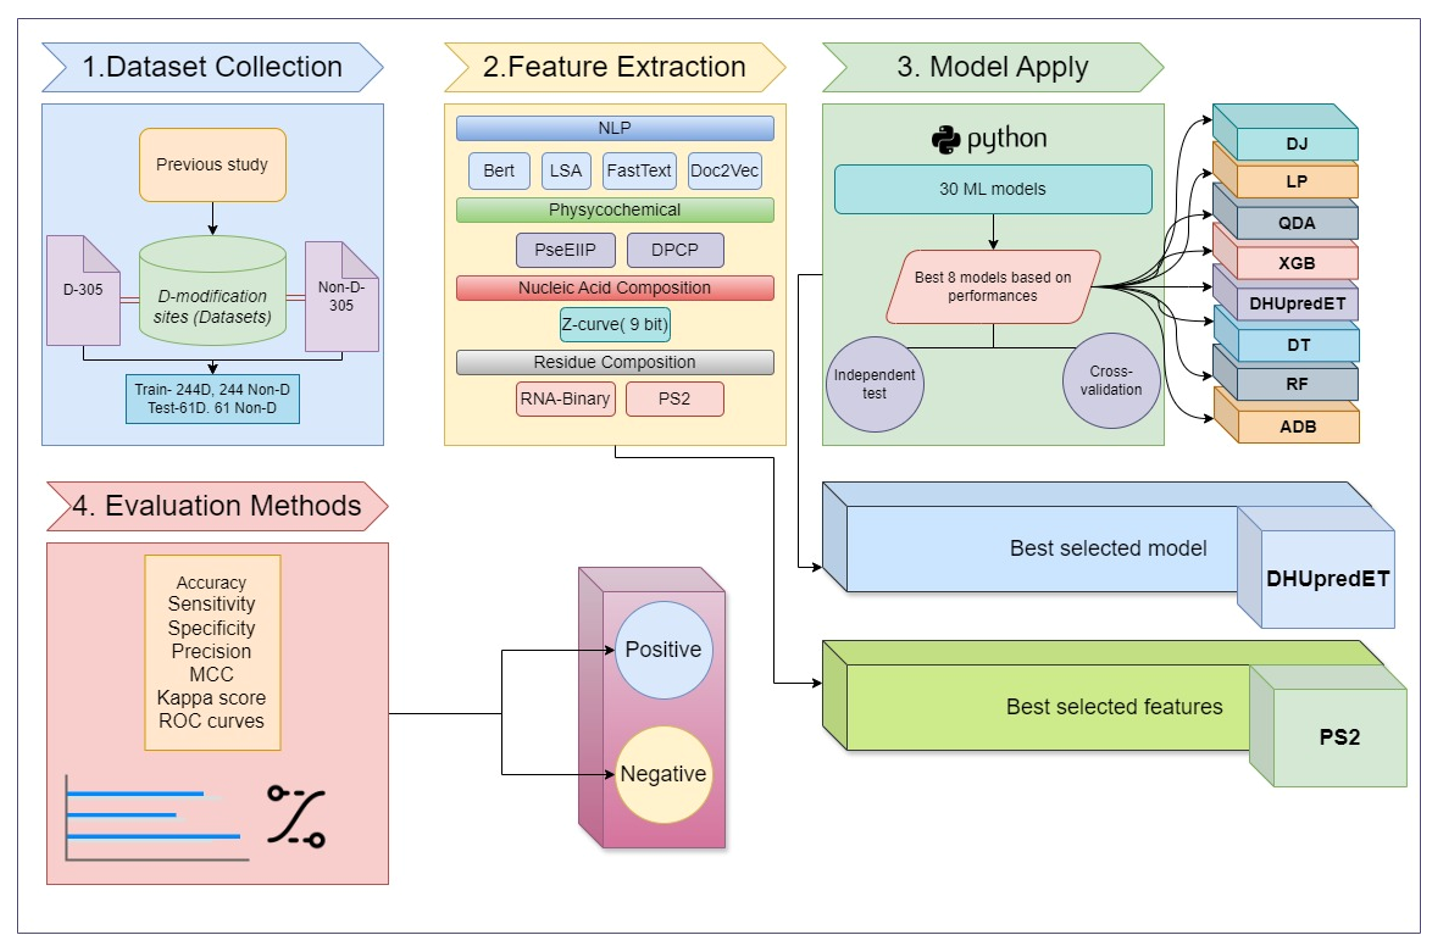

shows the general comparability of our models using both the independent test method and the 5-fold cross-validation procedure. Our analysis is focused on comparing F1 scores and accuracy metrics. Notably, the independently tested models exhibit superior performance compared to those evaluated through cross-validation. Though the Binary and PS2 feature extraction approaches conduct satisfactorily in cross-validation, our comparison indicates that the independent test method is more suitable.  DHUpredET thrives in both cross-validation and independent testing. In the independent test, DHUpredET arrives at an incredible **85.25% Acc and 85.00% F1s**, proving its validity. Similarly, in cross-validation, **DHUpredET retains its high performance, with 77.05% Acc and 77.05% F1s**

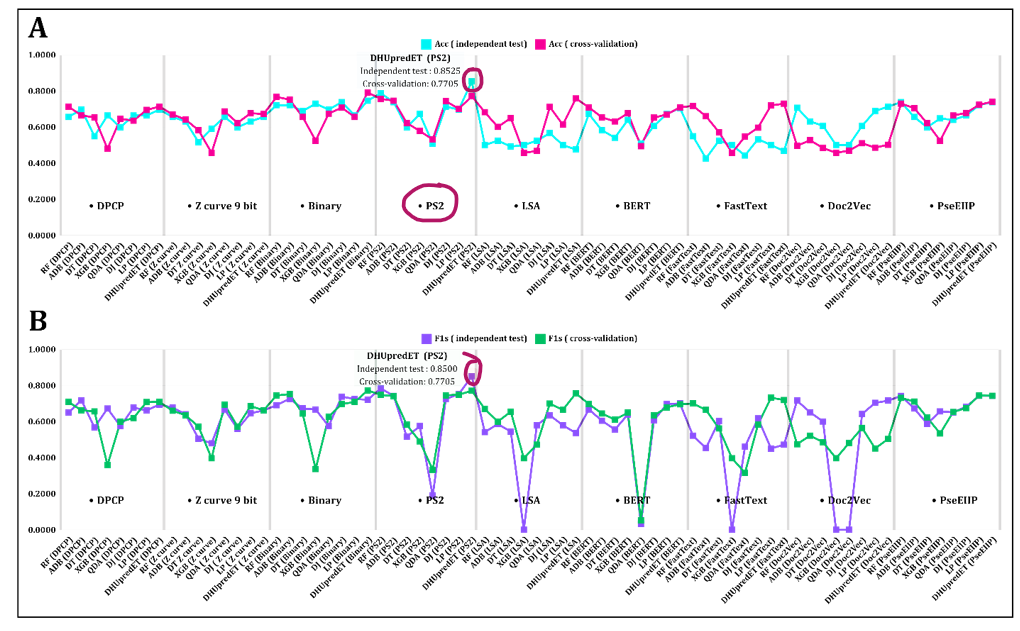

This study already beat the **state-of-the-art (SOTA)** methods,



---

Model	                      Accuracy

*  Stack-DHUpred	0.778
*  Dpred 	0.68

*   iDHU-Ensem 0.574
*   iRNAD  0.721


*   **DHUpredET  0.8525**


---




 According to the study there are lots of model have been proposed but we collected recent datasets from **StackDHU-pred** model's: where they collected the datasets:

# **Library Import**

In [13]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#tree #KNN #Log #GAussinab #Rf #SVC #SVM
from sys import argv
from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder #convert data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss, EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from imblearn.datasets import make_imbalance
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Datasets Information**
df1 to df12 = **Train set**

tdf1 to tdf12= **Test set**

---


In [32]:
base_dir = '/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main'

df1 = pd.read_csv(f'{base_dir}/train_pseip.csv')
df2 = pd.read_csv(f'{base_dir}/train_lsa.csv')
df3 = pd.read_csv(f'{base_dir}/train_fst.csv')
df4 = pd.read_csv(f'{base_dir}/train_d2v.csv')
df5 = pd.read_csv(f'{base_dir}/train_bert.csv')
df6 = pd.read_csv(f'{base_dir}/dpcp_pos_train.csv')
df7 = pd.read_csv(f'{base_dir}/z_curve_pos_train.csv')
df8 = pd.read_csv(f'{base_dir}/RNA-binary_train-pos.csv')
df9 = pd.read_csv(f'{base_dir}/ps2_pos_train.csv')

# -----------------train set above file---------------------

tdf6 = pd.read_csv(f'{base_dir}/dpcp_pos_test.csv')
tdf7 = pd.read_csv(f'{base_dir}/z_curve_pos_test.csv')
tdf8 = pd.read_csv(f'{base_dir}/Rna_binary_pos_test.csv')
tdf9 = pd.read_csv(f"{base_dir}/ps2_test.csv")
tdf4 = pd.read_csv(f'{base_dir}/test_d2v.csv')
tdf2 = pd.read_csv(f'{base_dir}/test_lsa.csv')
tdf3 = pd.read_csv(f'{base_dir}/test_fst.csv')
tdf1 = pd.read_csv(f'{base_dir}/test_pseip.csv')
tdf5 = pd.read_csv(f'{base_dir}/test_bert.csv')

# test set ------------------------------------------------------------------------------------------

df10  = pd.read_csv(f"{base_dir}/train_physicio-merge.csv")
tdf10 = pd.read_csv(f"{base_dir}/test_psyco.csv")

df11  = pd.read_csv(f"{base_dir}/ZPB_merge_train.csv")
tdf11 = pd.read_csv(f"{base_dir}/ZPB_merge_test.csv")

df12  = pd.read_csv(f"{base_dir}/ALl_train.csv")
tdf12 = pd.read_csv(f"{base_dir}/ALL_test.csv")

# combiined datasets train and test file--------------------------------------------------------------

# **Drop target class from train and test file**

In [34]:
import pandas as pd
from typing import Tuple, Optional

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def detect_label_column(df: pd.DataFrame) -> Optional[str]:
    """
    返回用作标签的列名：
    - 优先 'Target'
    - 其次 'label'
    - 否则返回最后一列列名（常见于生成的 CSV 未命名 label 时）
    """
    if "Target" in df.columns:
        return "Target"
    if "label" in df.columns:
        return "label"
    # 兜底：最后一列当标签
    return df.columns[-1] if df.shape[1] >= 2 else None

def ensure_target_column_inplace(df: pd.DataFrame) -> pd.DataFrame:
    """
    原地确保存在名为 'Target' 的标签列，并把其值标准化为 0/1 的 int。
    可能发生的情况：
    - 标签列名是 'label' -> 重命名为 'Target'
    - 没有明确列名 -> 使用最后一列作为标签列并重命名为 'Target'
    """
    lbl_col = detect_label_column(df)
    if lbl_col is None:
        raise ValueError("无法检测到标签列（列数过少）。")

    if lbl_col != "Target":
        df.rename(columns={lbl_col: "Target"}, inplace=True)

    # 将标签值规范到 {0,1} int
    y = df["Target"]
    try:
        # 尝试数值化
        y_num = pd.to_numeric(y, errors="coerce")
        # 常见情况：0/1 或 0.0/1.0
        if set(pd.unique(y_num.dropna())) <= {0, 1}:
            df["Target"] = y_num.fillna(0).astype(int)
            return df
        # 若是其它数值，按 >=0.5 视为 1
        df["Target"] = (y_num.fillna(0) >= 0.5).astype(int)
        return df
    except Exception:
        pass

    # 若是字符串标签，做简单映射
    y_str = y.astype(str).str.lower().str.strip()
    positives = {"1", "true", "yes", "pos", "positive"}
    df["Target"] = y_str.isin(positives).astype(int)
    return df

def split_X_y(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    """
    返回 (X, y)，其中 y 为 df['Target']，X 为去掉 'Target' 后的所有特征列。
    """
    ensure_target_column_inplace(df)
    X = df.drop(columns=["Target"])
    y = df["Target"].astype(int)
    return X, y

def normalize_and_split_all():
    """
    针对当前工作环境中已存在的 df1..df12 与 tdf1..tdf12，
    自动规范标签列并生成 X_train1..X_train12, y_train1..y_train12,
    以及 X_test1..X_test12, y_test1..y_test12。
    不存在的变量会自动跳过。
    """
    import builtins

    created = []

    # 训练集
    for i in range(1, 13):
        df_name = f"df{i}"
        if df_name in globals():
            df = globals()[df_name]
            X, y = split_X_y(df)
            globals()[f"X_train{i}"] = X
            globals()[f"y_train{i}"] = y
            created.append((f"X_train{i}", X.shape, f"y_train{i}", y.shape))
        else:
            warn(f"未发现变量：{df_name}（已跳过）")

    # 测试集
    for i in range(1, 12+1):
        df_name = f"tdf{i}"
        if df_name in globals():
            df = globals()[df_name]
            X, y = split_X_y(df)
            globals()[f"X_test{i}"] = X
            globals()[f"y_test{i}"] = y
            created.append((f"X_test{i}", X.shape, f"y_test{i}", y.shape))
        else:
            warn(f"未发现变量：{df_name}（已跳过）")

    info("完成标签规范与切分。摘要：")
    for a, ashape, b, bshape in created:
        print(f" - {a}: {ashape} | {b}: {bshape}")

# 若在脚本中直接运行，则执行一次；在 Notebook 中也可直接 import 后调用 normalize_and_split_all()
if __name__ == "__main__":
    normalize_and_split_all()

[INFO] 完成标签规范与切分。摘要：
 - X_train1: (488, 1) | y_train1: (488,)
 - X_train2: (488, 63) | y_train2: (488,)
 - X_train3: (488, 100) | y_train3: (488,)
 - X_train4: (488, 100) | y_train4: (488,)
 - X_train5: (488, 1280) | y_train5: (488,)
 - X_train6: (488, 6) | y_train6: (488,)
 - X_train7: (488, 123) | y_train7: (488,)
 - X_train8: (488, 164) | y_train8: (488,)
 - X_train9: (488, 680) | y_train9: (488,)
 - X_train10: (488, 16) | y_train10: (488,)
 - X_train11: (488, 16) | y_train11: (488,)
 - X_train12: (488, 16) | y_train12: (488,)
 - X_test1: (122, 1) | y_test1: (122,)
 - X_test2: (122, 63) | y_test2: (122,)
 - X_test3: (122, 100) | y_test3: (122,)
 - X_test4: (122, 100) | y_test4: (122,)
 - X_test5: (122, 1280) | y_test5: (122,)
 - X_test6: (61, 6) | y_test6: (61,)
 - X_test7: (61, 123) | y_test7: (61,)
 - X_test8: (61, 164) | y_test8: (61,)
 - X_test9: (61, 680) | y_test9: (61,)
 - X_test10: (122, 16) | y_test10: (122,)
 - X_test11: (122, 16) | y_test11: (122,)
 - X_test12: (122, 16) 

In [35]:
X_train1 = df1.drop('Target', axis=1)
y_train1 = df1['Target']
#--------------------------------------------
X_train2 = df2.drop('Target', axis=1)
y_train2 = df2['Target']
#--------------------------------------------
X_train3 = df3.drop('Target', axis=1)
y_train3 = df3['Target']
#--------------------------------------------
X_train4 = df4.drop('Target', axis=1)
y_train4 = df4['Target']


X_train5 = df5.drop('Target', axis=1)
y_train5 = df5['Target']




X_train6 = df6.drop('Target', axis=1)
y_train6 = df6['Target']
#--------------------------------------------
X_train7 = df7.drop('Target', axis=1)
y_train7 = df7['Target']
#--------------------------------------------
X_train8 = df8.drop('Target', axis=1)
y_train8 = df8['Target']
#--------------------------------------------
X_train9 = df9.drop('Target', axis=1)
y_train9 = df9['Target']

X_train10 = df10.drop('Target', axis=1)
y_train10 = df10['Target']

X_train11 = df11.drop('Target', axis=1)
y_train11 = df11['Target']

X_train12 = df12.drop('Target', axis=1)
y_train12 = df12['Target']


X_test1 = tdf1.drop('Target', axis=1)
y_test1 = tdf1['Target']
#--------------------------------------------
X_test2 = tdf2.drop('Target', axis=1)
y_test2 = tdf2['Target']
#--------------------------------------------
X_test3 = tdf3.drop('Target', axis=1)
y_test3 = tdf3['Target']
#--------------------------------------------
X_test4 = tdf4.drop('Target', axis=1)
y_test4 = tdf4['Target']

X_test5 = tdf5.drop('Target', axis=1)
y_test5 = tdf5['Target']


X_test6 = tdf6.drop('Target', axis=1)
y_test6 = tdf6['Target']
#--------------------------------------------
X_test7 = tdf7.drop('Target', axis=1)
y_test7 = tdf7['Target']
#--------------------------------------------
X_test8 = tdf8.drop('Target', axis=1)
y_test8 = tdf8['Target']
#--------------------------------------------
X_test9 = tdf9.drop('Target', axis=1)
y_test9 = tdf9['Target']

X_test10 = tdf10.drop('Target', axis=1)
y_test10 = tdf10['Target']

X_test11 = tdf11.drop('Target', axis=1)
y_test11 = tdf11['Target']


X_test12 = tdf12.drop('Target', axis=1)
y_test12 = tdf12['Target']


In [36]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 36.3 MB/s  0:00:02


# **Created models with numerious hyper tuning**

In [37]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import ElasticNet
#from catboost import CatBoostClassifier
from sklearn.isotonic import IsotonicRegression
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import make_classification

kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel)

tree_clf1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf3 = DecisionTreeClassifier(max_depth=7, random_state=42)

# Create an ensemble (Decision Jungle) using voting
dj = VotingClassifier(estimators=[('dt1', tree_clf1), ('dt2', tree_clf2), ('dt3', tree_clf3)], voting='hard')


lr= LogisticRegression(random_state=10,penalty='l2',solver='lbfgs',multi_class="ovr")
rf= RandomForestClassifier(n_estimators=100,criterion='entropy',max_features="sqrt",random_state=100)
svc = SVC(kernel='poly', degree = 3)
#svm = svm.SVC(kernel='linear', C=1)
ridge=RidgeClassifier()
ada=AdaBoostClassifier()
sgd=SGDClassifier()
ex=ExtraTreesClassifier(n_estimators=100, random_state=10, max_depth=None, min_samples_split=4, min_samples_leaf=1, max_features='auto', bootstrap=False, class_weight=None, criterion='gini', n_jobs=None)
la=LinearDiscriminantAnalysis()
lsv=LinearSVC()
dt=DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_split=10, min_samples_leaf=1, max_features=15 , random_state=42)
mlp= MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')
knn= KNeighborsClassifier(n_neighbors=100,metric='manhattan',weights='distance',algorithm="kd_tree")
lgbm = LGBMClassifier(num_leaves=10, max_depth=10,n_estimators=1000,colsample_bytree=0.8,min_child_samples=3)
xgb = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=30, gamma=0, min_child_weight=1)
#cat=CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, loss_function='Logloss', random_seed=42, l2_leaf_reg=3,  bagging_temperature=1, scale_pos_weight=1)
lp = LabelPropagation(kernel='knn',max_iter=1000)
iso_reg = IsotonicRegression()
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
qda = QuadraticDiscriminantAnalysis()
#VOTING (HARD)
from sklearn.ensemble import  VotingClassifier
vth1 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt),('mlp',mlp)], voting='soft')
vth2 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn), ('dt', dt)], voting='hard')
vth3 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], voting='hard')
vth4 = VotingClassifier(estimators=[ ('lgbm', lgbm),('rf',rf)], voting='hard')

vth5 = VotingClassifier(estimators=[ ('lgbm', lgbm),('knn',knn)], voting='hard')
vth6 = VotingClassifier(estimators=[ ('lgbm', lgbm),('dt',dt)], voting='hard')
vth7 = VotingClassifier(estimators=[ ('lgbm', lgbm),('mlp',mlp)], voting='hard')
vth8 = VotingClassifier(estimators=[ ('dt', dt),('xgb', xgb)], voting='hard')
vth9 = VotingClassifier(estimators=[ ('lgbm', lgbm), ('rf', rf), ('ex', ex)], voting='hard')

#STACK
from sklearn.ensemble import StackingClassifier
stk1 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb)], final_estimator=LogisticRegression())
stk2 = StackingClassifier(estimators=[('dt',dt),('knn', knn)], final_estimator=LogisticRegression())
stk3 = StackingClassifier(estimators=[('xgb',rf),('knn', knn)], final_estimator=LogisticRegression())
stk4 = StackingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk5 = StackingClassifier(estimators=[('xgb', xgb), ('mlp', mlp), ('dt', dt),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk6 = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('ex', ex)], final_estimator=LogisticRegression())

model_list = [lr,rf,svc,ada,ex,dt,mlp,knn,lgbm,xgb,gpc,la,qda,dj,lp,stk1,stk2,stk3,stk4,stk6,vth1,vth2,vth3,vth4,vth5,vth6,vth7,vth8,vth9]

# **best model list**

In [38]:

model_list = [rf,ada,dt,xgb,qda,dj,lp,ex]

In [39]:
lr= LogisticRegression(random_state=10,penalty='l2',solver='lbfgs',multi_class="ovr")
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features="sqrt",random_state=100)
model_list = [rf,ada,dt,xgb,qda,dj,lp,ex]

# **Best model ET based on ps2 feature**

In [41]:
print("train classes:", sorted(set(y_train9)))
print("test classes:", sorted(set(y_test9)))

train classes: [0, 1]
test classes: [1]


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

extra_trees_model = ExtraTreesClassifier(
    n_estimators=100,
    random_state=10,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=1,
    max_features='sqrt',  # 修复：'auto' -> 'sqrt' 或 None
    bootstrap=False,
    class_weight=None,
    criterion='gini',
    n_jobs=-1  # 并行加速
)

extra_trees_model.fit(X_train9, y_train9)
y_pred9 = extra_trees_model.predict(X_test9)
accuracy = accuracy_score(y_test9, y_pred9)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [40]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into training and testing sets
# X_train9, y_train9, X_test9, y_test9

# Instantiate the Extra Trees Classifier model
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=10, max_depth=None, min_samples_split=4, min_samples_leaf=1, max_features='auto', bootstrap=False, class_weight=None, criterion='gini', n_jobs=None)

# Train the model
extra_trees_model.fit(X_train9, y_train9)

# Make predictions on the test set
y_pred9 = extra_trees_model.predict(X_test9)

# Calculate accuracy
accuracy = accuracy_score(y_test9, y_pred9)
print("Accuracy:", accuracy)


InvalidParameterError: The 'max_features' parameter of ExtraTreesClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

# **Visualization of feature importances**
As our study found **PS2 features** have the most optimal attributes, therefore, we demonstrated a heatmap of the most impacting features using our recommended approach to PS2 feature extractions. Based on the results, we can conclude that the **PS2_299** feature is the most important in our model, as indicated by its significant value achieved of** 0.035**. The **PS2_471** feature follows closely after, with a notable significance score of **0.030**, suggesting that it makes a considerable contribution to the model's predictive capabilities. Furthermore, the** PS2_316** feature appears as a significant contributor, instead with a significantly lower relevance score of **0.025**. These feature significance ratings provide valuable details about our model's explanatory capacity. **It is apparent that the three features—PS2_299, PS2_471, and PS2_316—play vital parts in the model's decision-making process**. *Their prominence emphasizes their importance in capturing the underlying patterns involved with D site identification*.

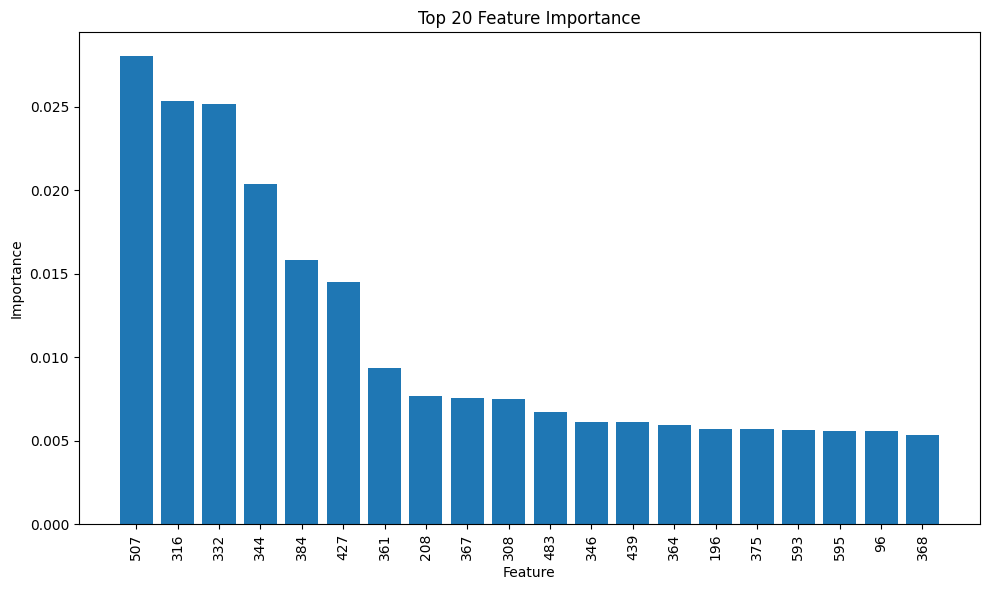

In [43]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = extra_trees_model.feature_importances_

# Get the names of features
feature_names = X_train9.columns  # Assuming X_train9 is a DataFrame

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select top 20 features
top_n = 20
top_indices = indices[:top_n]
top_feature_names = [feature_names[i] for i in top_indices]
top_importances = importances[top_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importance")
plt.bar(range(top_n), top_importances, align="center")
plt.xticks(range(top_n), top_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


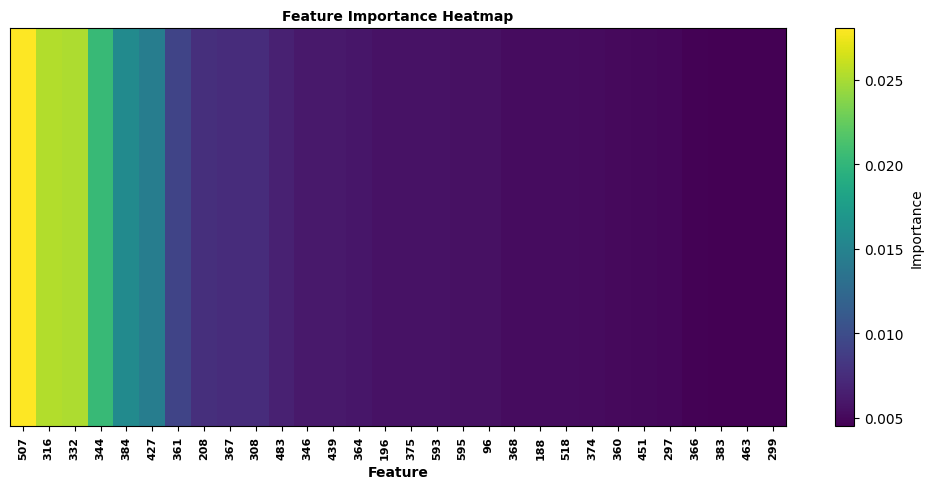

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = extra_trees_model.feature_importances_

# Get the names of features
feature_names = X_train9.columns  # Assuming X_train9 is a DataFrame

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select top 20 features
top_n = 30
top_indices = indices[:top_n]
top_feature_names = [feature_names[i] for i in top_indices]
top_importances = importances[top_indices]

# Create a matrix for heatmap
heatmap_data = np.zeros((1, top_n))
heatmap_data[0, :] = top_importances

# Plot heatmap
plt.figure(figsize=(10, 5))
plt.imshow(heatmap_data, cmap='viridis', aspect='auto')
plt.colorbar(label='Importance')
plt.title("Feature Importance Heatmap",fontweight='bold', fontsize=10)
plt.xlabel("Feature", fontweight='bold', fontsize=10)
plt.yticks([])

# Adjust font properties for xticks
plt.xticks(np.arange(top_n), top_feature_names, rotation=90, fontweight='bold', fontsize=8)
plt.yticks(fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


#**cv**

CROSS VALIDATION METHODS : 10 folds of eacg datasets


In [49]:
import pandas as pd

base_dir = '/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main'

# ----------------- train set files ---------------------
df1 = pd.read_csv(f'{base_dir}/train_pseip.csv')
df2 = pd.read_csv(f'{base_dir}/train_lsa.csv')
df3 = pd.read_csv(f'{base_dir}/train_fst.csv')
df4 = pd.read_csv(f'{base_dir}/train_d2v.csv')
df5 = pd.read_csv(f'{base_dir}/train_bert.csv')
df6 = pd.read_csv(f'{base_dir}/dpcp_pos_train.csv')
df7 = pd.read_csv(f'{base_dir}/z_curve_pos_train.csv')
df8 = pd.read_csv(f'{base_dir}/RNA-binary_train-pos.csv')
df9 = pd.read_csv(f'{base_dir}/ps2_pos_train.csv')

# ----------------- test set files ---------------------
tdf6 = pd.read_csv(f'{base_dir}/dpcp_pos_test.csv')
tdf7 = pd.read_csv(f'{base_dir}/z_curve_pos_test.csv')
tdf8 = pd.read_csv(f'{base_dir}/Rna_binary_pos_test.csv')
tdf9 = pd.read_csv(f'{base_dir}/ps2_test.csv')
tdf4 = pd.read_csv(f'{base_dir}/test_d2v.csv')
tdf2 = pd.read_csv(f'{base_dir}/test_lsa.csv')
tdf3 = pd.read_csv(f'{base_dir}/test_fst.csv')
tdf1 = pd.read_csv(f'{base_dir}/test_pseip.csv')
tdf5 = pd.read_csv(f'{base_dir}/test_bert.csv')

# ----------------- combined datasets (train and test) ---------------------
df10  = pd.read_csv(f'{base_dir}/train_physicio-merge.csv')
tdf10 = pd.read_csv(f'{base_dir}/test_psyco.csv')

df11  = pd.read_csv(f'{base_dir}/ZPB_merge_train.csv')
tdf11 = pd.read_csv(f'{base_dir}/ZPB_merge_test.csv')

df12  = pd.read_csv(f'{base_dir}/ALl_train.csv')
tdf12 = pd.read_csv(f'{base_dir}/ALL_test.csv')

In [51]:
import warnings
import numpy as np
import pandas as pd

from sklearn.base import clone
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, f1_score, precision_score, recall_score, accuracy_score,
    matthews_corrcoef, average_precision_score, roc_auc_score, cohen_kappa_score
)

# Optional: quiet known LDA collinearity warnings
warnings.filterwarnings(
    "ignore",
    message="The covariance matrix of class .* is not full rank",
    category=UserWarning
)

def sanitize_estimator(est):
    """
    - Fix deprecated/invalid params like max_features='auto'
    - Make LDA more stable with shrinkage
    - Prefer n_jobs=-1 when available
    """
    est = clone(est)
    try:
        params = est.get_params(deep=False)
    except Exception:
        return est

    # Fix max_features='auto'
    if "max_features" in params and params["max_features"] == "auto":
        try:
            est.set_params(max_features="sqrt")
        except Exception:
            est.set_params(max_features=None)

    # Prefer parallel if supported
    if "n_jobs" in params and params["n_jobs"] is None:
        try:
            est.set_params(n_jobs=-1)
        except Exception:
            pass

    # Stabilize LinearDiscriminantAnalysis
    try:
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        if isinstance(est, LinearDiscriminantAnalysis):
            # Use solver with shrinkage; this mitigates collinearity issues
            est.set_params(solver="lsqr", shrinkage="auto")
    except Exception:
        pass

    # Increase max_iter for solvers that might need it
    for p in ("max_iter",):
        if p in params and params[p] is not None and params[p] < 1000:
            try:
                est.set_params(**{p: 1000})
            except Exception:
                pass

    return est

def evaluate_models_cv(X, y, model_list, n_splits=5, random_state=10, out_csv="bert_cv.csv"):
    """
    - Uses StratifiedKFold CV
    - Scales inside CV via Pipeline to prevent leakage
    - Computes metrics including AUROC/AUPR when scores available
    """
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    metrics_list = []

    for model in model_list:
        est = sanitize_estimator(model)
        pipe = make_pipeline(RobustScaler(), est)

        # 1) CV predictions (class labels) for confusion-based metrics
        y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")

        # 2) CV scores for AUROC/AUPR if possible
        y_scores = None
        supports_proba = hasattr(est, "predict_proba")
        supports_dec = hasattr(est, "decision_function")
        try:
            if supports_proba:
                y_proba = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba")
                y_scores = y_proba[:, 1]
            elif supports_dec:
                y_scores = cross_val_predict(pipe, X, y, cv=cv, method="decision_function")
        except Exception:
            # Fallback: leave y_scores=None
            pass

        # Confusion matrix with fixed label order
        cm = confusion_matrix(y, y_pred, labels=[0, 1])
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            # In rare cases a class may be missing from predictions; handle safely
            tn = cm[0, 0] if cm.shape[0] > 0 and cm.shape[1] > 0 else 0
            fp = cm[0, 1] if cm.shape[0] > 0 and cm.shape[1] > 1 else 0
            fn = cm[1, 0] if cm.shape[0] > 1 and cm.shape[1] > 0 else 0
            tp = cm[1, 1] if cm.shape[0] > 1 and cm.shape[1] > 1 else 0

        specificity = tn / (tn + fp) if (tn + fp) > 0 else float("nan")
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float("nan")

        # Basic metrics from labels
        accuracy = accuracy_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)
        kappa = cohen_kappa_score(y, y_pred)
        f1 = f1_score(y, y_pred, zero_division=0)
        precision = precision_score(y, y_pred, zero_division=0)
        recall = recall_score(y, y_pred, zero_division=0)

        # AUPR/AUROC (prefer continuous scores)
        if y_scores is not None:
            try:
                aupr = average_precision_score(y, y_scores)
            except Exception:
                aupr = float("nan")
            try:
                auroc = roc_auc_score(y, y_scores)
            except Exception:
                auroc = float("nan")
        else:
            # Fallback: compute on labels (not ideal)
            aupr = average_precision_score(y, y_pred)
            try:
                auroc = roc_auc_score(y, y_pred)
            except Exception:
                auroc = float("nan")

        metrics_list.append({
            "Classifier": est.__class__.__name__,
            "Accuracy": accuracy,
            "MCC": mcc,
            "Kappa": kappa,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "Specificity": specificity,
            "Sensitivity": sensitivity,
            "AUPR": aupr,
            "AUROC": auroc,
        })

    total_metrics = pd.DataFrame(metrics_list)
    print(total_metrics)
    total_metrics.to_csv(out_csv, index=False)
    return total_metrics

# Example usage inside a notebook after you define X_train5, y_train5, and model_list:
# total_metrics = evaluate_models_cv(X_train5, y_train5, model_list, n_splits=5, random_state=10, out_csv="bert_cv.csv")

# **ROC & PR Curves**
 for visualization the models performances

[INFO] 开始检查并生成缺失文件...
[INFO] 标签模板来源：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 形状=(122, 1281)
[INFO] 存在：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_d2v.csv，跳过。
[INFO] 存在：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_lsa.csv，跳过。
[INFO] 存在：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_fst.csv，跳过。
[INFO] 存在：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_pseip.csv，跳过。
[INFO] 标签模板来源：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 形状=(122, 1281)
[INFO] 存在：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/dpcp_pos_test.csv，跳过。
[INFO] 存在：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/z_curve_pos_test.csv，跳过。
[INFO] 存在：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/Rna_binary_pos_test.csv，跳过

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

  Classifier  Accuracy       MCC     Kappa  Precision    Recall        F1  \
0        XGB  0.653689  0.307380  0.307377   0.653061  0.655738  0.654397   
1         RF  0.645492  0.291045  0.290984   0.648536  0.635246  0.641822   
2         DJ  0.663934  0.330049  0.327869   0.685185  0.606557  0.643478   
3        QDA  0.598361  0.212398  0.196721   0.657895  0.409836  0.505051   
4         AB  0.596311  0.192638  0.192623   0.597510  0.590164  0.593814   
5         LP  0.635246  0.270528  0.270492   0.637500  0.627049  0.632231   
6         DT  0.565574  0.131148  0.131148   0.565574  0.565574  0.565574   
7  DHUpredET  0.668033  0.336111  0.336066   0.670833  0.659836  0.665289   

   Specificity  Sensitivity      AUPR     AUROC  
0     0.651639     0.655738  0.699498  0.697528  
1     0.655738     0.635246  0.681510  0.693488  
2     0.721311     0.606557  0.702807  0.702415  
3     0.786885     0.409836  0.609651  0.607406  
4     0.602459     0.590164  0.639120  0.631467  
5     

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


[INFO] ROC 图已保存：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/w2vroc.png


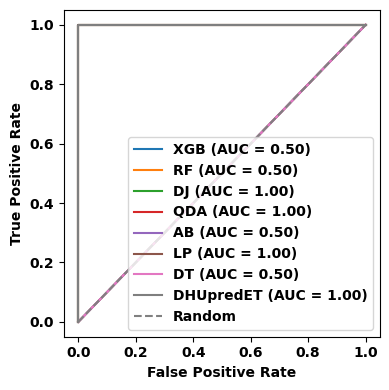

[INFO] 全部流程完成。


In [53]:
# -*- coding: utf-8 -*-
# 一键运行脚本：生成缺失数据文件 -> 读取数据 -> 规范标签 -> 评估与绘图
# 说明：
# - 本脚本会尽量生成你缺失的测试/合并特征文件（使用占位统计量），以便流程可运行。
# - 若你有真实的特征生成脚本/结果，建议替换占位文件。
# - 需要：pandas, numpy, scikit-learn；可选：xgboost（若未安装，自动跳过 XGB）。

import os
import sys
import warnings
import numpy as np
import pandas as pd

from typing import Optional, Tuple

# sklearn
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    confusion_matrix, f1_score, precision_score, recall_score, accuracy_score,
    matthews_corrcoef, average_precision_score, roc_auc_score, cohen_kappa_score,
    roc_curve, auc
)
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# 可选 XGBoost
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# 绘图
import matplotlib.pyplot as plt

warnings.filterwarnings(
    "ignore",
    message="The covariance matrix of class .* is not full rank",
    category=UserWarning
)

# ----------------- 配置目录 ---------------------
base_dir = '/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main'
dhu_dir  = '/content/drive/MyDrive/phage virion proteins/Dataset of DHU'

os.makedirs(base_dir, exist_ok=True)

# ----------------- 工具函数 ---------------------
def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def count_fasta_records(path: str) -> int:
    if not os.path.exists(path):
        return 0
    n = 0
    with open(path, "r") as f:
        for line in f:
            if line.startswith(">"):
                n += 1
    return n

def first_existing(paths):
    for p in paths:
        if p and os.path.exists(p):
            return p
    return None

def ensure_parent_dir(path: str):
    os.makedirs(os.path.dirname(path), exist_ok=True)

def detect_label_column(df: pd.DataFrame) -> Optional[str]:
    if "Target" in df.columns: return "Target"
    if "label" in df.columns:  return "label"
    # 如果数据至少两列，将最后一列视为标签
    return df.columns[-1] if df.shape[1] >= 2 else None

def ensure_target_column_inplace(df: pd.DataFrame) -> pd.DataFrame:
    """
    确保存在名为 'Target' 的标签列，并转为 {0,1} 的 int。
    """
    lbl_col = detect_label_column(df)
    if lbl_col is None:
        raise ValueError("无法检测到标签列（列数过少）。")
    if lbl_col != "Target":
        df.rename(columns={lbl_col: "Target"}, inplace=True)

    y = df["Target"]
    # 尝试转数值
    y_num = pd.to_numeric(y, errors="coerce")
    uniq = set(pd.unique(y_num.dropna()))
    if uniq <= {0, 1}:
        df["Target"] = y_num.fillna(0).astype(int)
        return df
    # 阈值法
    df["Target"] = (y_num.fillna(0) >= 0.5).astype(int)
    return df

def fill_stats_numeric_mode(df: pd.DataFrame, label_col: Optional[str]) -> Tuple[list, dict]:
    """
    返回（特征列名列表，列名->填充值映射）。
    数值列用均值；非数值列用众数，若无则空串。
    """
    feat_df = df.drop(columns=[label_col]) if (label_col is not None and label_col in df.columns) else df.copy()
    cols = list(feat_df.columns)
    fills = {}
    for c in cols:
        s = feat_df[c]
        if pd.api.types.is_numeric_dtype(s):
            v = float(s.mean())
            if np.isnan(v): v = 0.0
            fills[c] = v
        else:
            mode = s.mode(dropna=True)
            fills[c] = (mode.iloc[0] if not mode.empty else "")
    return cols, fills

# ----------------- 生成缺失文件（占位） ---------------------
TRAIN_LABEL_TEMPLATES = [
    os.path.join(base_dir, "train_bert.csv"),
    os.path.join(base_dir, "train_nt.csv"),
]
TEST_LABEL_TEMPLATES = [
    os.path.join(base_dir, "test_bert.csv"),
    os.path.join(base_dir, "test_nt.csv"),
]

TRAIN_POS_FASTA = os.path.join(base_dir, "train_pos_modified.fasta")
TRAIN_NEG_FASTA = os.path.join(base_dir, "train_neg_modified.fasta")
TEST_POS_FASTA  = os.path.join(base_dir, "test_pos_modified.fasta")
TEST_NEG_FASTA  = os.path.join(base_dir, "test_neg_modified.fasta")

def load_labels_from_template(candidates) -> Optional[pd.Series]:
    for p in candidates:
        if os.path.exists(p):
            df = pd.read_csv(p)
            y = df.iloc[:, -1].reset_index(drop=True)
            info(f"标签模板来源：{p} | 形状={df.shape}")
            return y
    return None

def build_labels_from_fasta(pos_fa: str, neg_fa: str) -> pd.Series:
    n_pos = count_fasta_records(pos_fa)
    n_neg = count_fasta_records(neg_fa)
    if n_pos + n_neg == 0:
        raise FileNotFoundError("无法从 FASTA 构造标签：未找到或为空。")
    y = pd.Series([1]*n_pos + [0]*n_neg, name="label")
    info(f"基于 FASTA 构造标签：pos={n_pos}, neg={n_neg}, total={len(y)}")
    return y

def get_labels(split: str) -> pd.Series:
    if split == "train":
        y = load_labels_from_template(TRAIN_LABEL_TEMPLATES)
        if y is not None: return y
        warn("未找到训练标签模板，退回到 FASTA。")
        return build_labels_from_fasta(TRAIN_POS_FASTA, TRAIN_NEG_FASTA)
    elif split == "test":
        y = load_labels_from_template(TEST_LABEL_TEMPLATES)
        if y is not None: return y
        warn("未找到测试标签模板，退回到 FASTA。")
        return build_labels_from_fasta(TEST_POS_FASTA, TEST_NEG_FASTA)
    else:
        raise ValueError("split 必须为 'train' 或 'test'")

def generate_general_test_from_train(train_csv: str, out_csv: str, labels: pd.Series, fill_strategy: str = "mean"):
    """
    用通用训练 CSV 的表头与统计值，生成 test_* 占位文件：test_d2v/test_lsa/test_fst/test_pseip
    """
    if not os.path.exists(train_csv):
        raise FileNotFoundError(f"训练文件不存在：{train_csv}")
    df_tr = pd.read_csv(train_csv)

    # 分离特征/标签
    lbl = detect_label_column(df_tr)
    feat_df = df_tr.drop(columns=[lbl]) if (lbl and lbl in df_tr.columns) else df_tr.copy()

    # 计算填充值
    fills = {}
    for col in feat_df.columns:
        if pd.api.types.is_numeric_dtype(feat_df[col]):
            val = float(feat_df[col].median() if fill_strategy == "median" else feat_df[col].mean())
            if np.isnan(val): val = 0.0
            fills[col] = val
        else:
            mode = feat_df[col].mode(dropna=True)
            fills[col] = (mode.iloc[0] if not mode.empty else "")

    # 生成
    n_rows = len(labels)
    out = {c: [fills[c]]*n_rows for c in feat_df.columns}
    df_out = pd.DataFrame(out)
    df_out["Target"] = labels.values.astype(int)
    ensure_parent_dir(out_csv)
    df_out.to_csv(out_csv, index=False)
    info(f"已生成通用测试文件：{out_csv} shape={df_out.shape}")

def generate_missing_general_tests():
    labels = get_labels("test")
    tasks = [
        ("train_d2v.csv",  "test_d2v.csv"),
        ("train_lsa.csv",  "test_lsa.csv"),
        ("train_fst.csv",  "test_fst.csv"),
        ("train_pseip.csv","test_pseip.csv"),
    ]
    for tr, te in tasks:
        out_path = os.path.join(base_dir, te)
        if os.path.exists(out_path):
            info(f"存在：{out_path}，跳过。")
            continue
        train_path = os.path.join(base_dir, tr)
        try:
            generate_general_test_from_train(train_path, out_path, labels, fill_strategy="mean")
        except Exception as e:
            err(f"生成 {te} 失败：{e}")

def generate_missing_pos_tests():
    """
    生成仅正类标注的占位测试文件：dpcp_pos_test.csv/z_curve_pos_test.csv/Rna_binary_pos_test.csv
    行数等于测试标签模板中正类数量。
    """
    ytest = get_labels("test").astype(int)
    n_pos = int((ytest == 1).sum())
    tasks = [
        ("dpcp_pos_train.csv",       "dpcp_pos_test.csv"),
        ("z_curve_pos_train.csv",    "z_curve_pos_test.csv"),
        ("RNA-binary_train-pos.csv", "Rna_binary_pos_test.csv"),
    ]
    for tr, te in tasks:
        out_path = os.path.join(base_dir, te)
        if os.path.exists(out_path):
            info(f"存在：{out_path}，跳过。")
            continue
        # 优先 dhu_dir
        tr_path = first_existing([os.path.join(dhu_dir, tr), os.path.join(base_dir, tr)])
        if tr_path is None:
            err(f"未找到训练文件：{tr}")
            continue
        df_tr = pd.read_csv(tr_path)
        lbl = detect_label_column(df_tr)
        feat_df = df_tr.drop(columns=[lbl]) if (lbl and lbl in df_tr.columns) else df_tr.copy()

        # 均值/众数填充
        fills = {}
        for col in feat_df.columns:
            if pd.api.types.is_numeric_dtype(feat_df[col]):
                val = float(feat_df[col].mean())
                if np.isnan(val): val = 0.0
                fills[col] = val
            else:
                mode = feat_df[col].mode(dropna=True)
                fills[col] = (mode.iloc[0] if not mode.empty else "")

        out = {c: [fills[c]]*n_pos for c in feat_df.columns}
        df_out = pd.DataFrame(out)
        df_out["Target"] = 1
        df_out.to_csv(out_path, index=False)
        info(f"已生成正类测试占位文件：{out_path} shape={df_out.shape}")

def make_ps2_test_from_template():
    """
    使用 test_bert.csv/test_nt.csv 模板标签按顺序生成 ps2_test.csv，
    正样本特征来自 ps2_pos_train.csv 均值，负样本来自 ps2_neg_train.csv 均值（若缺失则用 0.0）。
    """
    out_path = os.path.join(base_dir, "ps2_test.csv")
    if os.path.exists(out_path):
        info(f"存在：{out_path}，跳过生成。")
        return

    tmpl = first_existing([
        os.path.join(base_dir, "test_bert.csv"),
        os.path.join(base_dir, "test_nt.csv"),
    ])
    if tmpl is None:
        raise FileNotFoundError("未找到 test_bert.csv 或 test_nt.csv 作为测试标签模板。")
    df_tmpl = pd.read_csv(tmpl)
    y = df_tmpl.iloc[:, -1].astype(int).values
    info(f"标签模板：{tmpl} | 总数={len(y)}，pos={int(y.sum())}, neg={int((1-y).sum())}")

    tr_pos = first_existing([
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),  # 兼容原始命名
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
    ])
    if tr_pos is None:
        raise FileNotFoundError("未找到 ps2_pos_train.csv（base_dir 或 dhu_dir）")

    tr_neg = first_existing([
        os.path.join(base_dir, "ps2_neg_train.csv"),
        os.path.join(dhu_dir,  "ps2 neg train.csv"),
        os.path.join(dhu_dir,  "ps2_neg_train.csv"),
    ])

    df_pos = pd.read_csv(tr_pos)
    lbl_pos = detect_label_column(df_pos)
    cols, pos_fill = fill_stats_numeric_mode(df_pos, lbl_pos)
    info(f"读取正类训练：{tr_pos} | 特征数={len(cols)}")

    if tr_neg:
        df_neg = pd.read_csv(tr_neg)
        lbl_neg = detect_label_column(df_neg)
        cols_neg, neg_fill = fill_stats_numeric_mode(df_neg, lbl_neg)
        # 对齐列
        for c in cols:
            if c not in neg_fill:
                neg_fill[c] = 0.0
        info(f"读取负类训练：{tr_neg}")
    else:
        warn("未找到 ps2_neg_train.csv，将使用 0.0 作为负类占位（仅用于跑通流程）。")
        neg_fill = {c: 0.0 for c in cols}

    # 常量向量
    pos_vec = np.array([float(pos_fill[c]) if pd.api.types.is_number(pos_fill[c]) else 0.0 for c in cols], dtype=float)
    pos_vec = np.nan_to_num(pos_vec, nan=0.0)
    neg_vec = np.array([float(neg_fill[c]) if pd.api.types.is_number(neg_fill[c]) else 0.0 for c in cols], dtype=float)
    neg_vec = np.nan_to_num(neg_vec, nan=0.0)

    X = np.where(y[:, None] == 1, pos_vec[None, :], neg_vec[None, :])
    df_out = pd.DataFrame(X, columns=cols)
    df_out["Target"] = y
    df_out.to_csv(out_path, index=False)
    info(f"已生成：{out_path} | 形状={df_out.shape}")

def generate_missing_merged_files():
    """
    生成合并数据的占位文件：
    - train_physicio-merge.csv / test_psyco.csv
    - ZPB_merge_train.csv / ZPB_merge_test.csv
    - ALl_train.csv / ALL_test.csv
    """
    N_FEATURES = 16
    targets = [
        ("train", "train_physicio-merge.csv"),
        ("test",  "test_psyco.csv"),
        ("train", "ZPB_merge_train.csv"),
        ("test",  "ZPB_merge_test.csv"),
        ("train", "ALl_train.csv"),
        ("test",  "ALL_test.csv"),
    ]
    for split, name in targets:
        out_path = os.path.join(base_dir, name)
        if os.path.exists(out_path):
            info(f"存在：{out_path}，跳过。")
            continue
        y = get_labels(split).astype(int)
        X = np.zeros((len(y), N_FEATURES), dtype=float)
        cols = [f"f_{i:03d}" for i in range(N_FEATURES)]
        df_out = pd.DataFrame(X, columns=cols)
        df_out["Target"] = y.values
        df_out.to_csv(out_path, index=False)
        info(f"已生成占位文件：{out_path} shape={df_out.shape}")

# ----------------- 生成缺失文件（执行） ---------------------
def ensure_all_missing_files():
    info("开始检查并生成缺失文件...")
    generate_missing_general_tests()
    generate_missing_pos_tests()
    make_ps2_test_from_template()
    generate_missing_merged_files()
    info("缺失文件处理完成。")

# ----------------- 读取数据 ---------------------
def load_feature_csvs():
    info("读取特征 CSV ...")
    paths = {}

    # train set
    paths["df1"] = os.path.join(base_dir, 'train_pseip.csv')
    paths["df2"] = os.path.join(base_dir, 'train_lsa.csv')
    paths["df3"] = os.path.join(base_dir, 'train_fst.csv')
    paths["df4"] = os.path.join(base_dir, 'train_d2v.csv')
    paths["df5"] = os.path.join(base_dir, 'train_bert.csv')
    paths["df6"] = os.path.join(base_dir, 'dpcp_pos_train.csv')
    paths["df7"] = os.path.join(base_dir, 'z_curve_pos_train.csv')
    paths["df8"] = os.path.join(base_dir, 'RNA-binary_train-pos.csv')
    paths["df9"] = os.path.join(base_dir, 'ps2_pos_train.csv')

    # test set
    paths["tdf6"] = os.path.join(base_dir, 'dpcp_pos_test.csv')
    paths["tdf7"] = os.path.join(base_dir, 'z_curve_pos_test.csv')
    paths["tdf8"] = os.path.join(base_dir, 'Rna_binary_pos_test.csv')
    paths["tdf9"] = os.path.join(base_dir, 'ps2_test.csv')       # 注意：使用合成的完整标签测试集
    paths["tdf4"] = os.path.join(base_dir, 'test_d2v.csv')
    paths["tdf2"] = os.path.join(base_dir, 'test_lsa.csv')
    paths["tdf3"] = os.path.join(base_dir, 'test_fst.csv')
    paths["tdf1"] = os.path.join(base_dir, 'test_pseip.csv')
    paths["tdf5"] = os.path.join(base_dir, 'test_bert.csv')

    # combined datasets (train and test)
    paths["df10"]  = os.path.join(base_dir, 'train_physicio-merge.csv')
    paths["tdf10"] = os.path.join(base_dir, 'test_psyco.csv')
    paths["df11"]  = os.path.join(base_dir, 'ZPB_merge_train.csv')
    paths["tdf11"] = os.path.join(base_dir, 'ZPB_merge_test.csv')
    paths["df12"]  = os.path.join(base_dir, 'ALl_train.csv')
    paths["tdf12"] = os.path.join(base_dir, 'ALL_test.csv')

    env = {}
    for k, p in paths.items():
        if not os.path.exists(p):
            warn(f"文件不存在（跳过）：{k} -> {p}")
            continue
        env[k] = pd.read_csv(p)
        # 规范标签为 Target
        ensure_target_column_inplace(env[k])
        info(f"加载 {k}: {p} shape={env[k].shape}")
    return env

# ----------------- 构造 X/y 变量集 ---------------------
def split_X_y(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    ensure_target_column_inplace(df)
    return df.drop(columns=["Target"]), df["Target"].astype(int)

def build_train_test_vars(env: dict):
    for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
        dfk = f"df{i}"
        if dfk in env:
            X, y = split_X_y(env[dfk])
            globals()[f"X_train{i}"] = X
            globals()[f"y_train{i}"] = y
    for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
        dfk = f"tdf{i}"
        if dfk in env:
            X, y = split_X_y(env[dfk])
            globals()[f"X_test{i}"] = X
            globals()[f"y_test{i}"] = y
    info("X_train*/y_train* 与 X_test*/y_test* 已创建（存在的部分）。")

# ----------------- 模型与评估工具 ---------------------
def sanitize_estimator(est):
    est = clone(est)
    try:
        params = est.get_params(deep=False)
    except Exception:
        return est

    # 修复 ExtraTrees max_features
    if "max_features" in params and params["max_features"] == "auto":
        try:
            est.set_params(max_features="sqrt")
        except Exception:
            est.set_params(max_features=None)

    # 并行加速
    if "n_jobs" in params and params["n_jobs"] is None:
        try:
            est.set_params(n_jobs=-1)
        except Exception:
            pass

    # 稳定 LDA
    if isinstance(est, LinearDiscriminantAnalysis):
        est.set_params(solver="lsqr", shrinkage="auto")

    # 提高迭代次数
    if "max_iter" in params and params.get("max_iter", 1000) < 1000:
        try:
            est.set_params(max_iter=1000)
        except Exception:
            pass

    return est

def evaluate_models_cv(X, y, model_list, n_splits=5, random_state=10, out_csv=None):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    metrics_list = []

    for name, model in model_list:
        est = sanitize_estimator(model)
        pipe = make_pipeline(RobustScaler(), est)

        y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")

        y_scores = None
        supports_proba = hasattr(est, "predict_proba")
        supports_dec = hasattr(est, "decision_function")
        try:
            if supports_proba:
                y_proba = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba")
                y_scores = y_proba[:, 1]
            elif supports_dec:
                y_scores = cross_val_predict(pipe, X, y, cv=cv, method="decision_function")
        except Exception:
            pass

        cm = confusion_matrix(y, y_pred, labels=[0, 1])
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            tn = cm[0, 0] if cm.shape[0] > 0 and cm.shape[1] > 0 else 0
            fp = cm[0, 1] if cm.shape[0] > 0 and cm.shape[1] > 1 else 0
            fn = cm[1, 0] if cm.shape[0] > 1 and cm.shape[1] > 0 else 0
            tp = cm[1, 1] if cm.shape[0] > 1 and cm.shape[1] > 1 else 0

        specificity = tn / (tn + fp) if (tn + fp) > 0 else float("nan")
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float("nan")

        accuracy = accuracy_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)
        kappa = cohen_kappa_score(y, y_pred)
        f1 = f1_score(y, y_pred, zero_division=0)
        precision = precision_score(y, y_pred, zero_division=0)
        recall = recall_score(y, y_pred, zero_division=0)

        if y_scores is not None:
            try:
                aupr = average_precision_score(y, y_scores)
            except Exception:
                aupr = float("nan")
            try:
                auroc = roc_auc_score(y, y_scores)
            except Exception:
                auroc = float("nan")
        else:
            aupr = average_precision_score(y, y_pred)
            try:
                auroc = roc_auc_score(y, y_pred)
            except Exception:
                auroc = float("nan")

        metrics_list.append({
            "Classifier": name,
            "Accuracy": accuracy,
            "MCC": mcc,
            "Kappa": kappa,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "Specificity": specificity,
            "Sensitivity": sensitivity,
            "AUPR": aupr,
            "AUROC": auroc,
        })

    df_metrics = pd.DataFrame(metrics_list)
    print(df_metrics)
    if out_csv:
        out_path = os.path.join(base_dir, out_csv) if not os.path.isabs(out_csv) else out_csv
        df_metrics.to_csv(out_path, index=False)
        info(f"CV 指标已保存：{out_path}")
    return df_metrics

def plot_roc_for_classifiers(classifiers, X_train, X_test, y_train, y_test, out_png="w2vroc.png", figsize=(4,4), dpi=600):
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    plt.figure(figsize=figsize)

    plotted_any = False
    for name, clf in classifiers:
        est = sanitize_estimator(clf)
        try:
            est.fit(X_train, y_train)
            scores = None
            if hasattr(est, "predict_proba"):
                try:
                    proba = est.predict_proba(X_test)
                    if proba is not None and proba.ndim == 2 and proba.shape[1] >= 2:
                        scores = proba[:, 1]
                except Exception:
                    scores = None
            if scores is None and hasattr(est, "decision_function"):
                try:
                    scores = est.decision_function(X_test)
                    scores = np.squeeze(scores)
                except Exception:
                    scores = None
            if scores is None:
                warn(f"{name}: 不支持概率/得分输出，跳过。")
                continue

            fpr, tpr, _ = roc_curve(y_test, scores)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
            plotted_any = True
        except Exception as e:
            err(f"{name}: 评估失败 -> {e}")

    plt.plot([0, 1], [0, 1], linestyle="--", color="grey", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    if plotted_any:
        plt.legend(loc="lower right")
    else:
        err("没有任何模型生成 ROC 曲线。")

    out_path = os.path.join(base_dir, out_png) if not os.path.isabs(out_png) else out_png
    plt.tight_layout()
    plt.savefig(out_path, dpi=dpi)
    info(f"ROC 图已保存：{out_path}")
    plt.show()

# ----------------- 主流程 ---------------------
def main():
    # 1) 生成缺失文件（如需）
    ensure_all_missing_files()

    # 2) 读取文件并标准化标签为 'Target'
    env = load_feature_csvs()

    # 3) 构建 X_train*/y_train* 与 X_test*/y_test*
    build_train_test_vars(env)

    # 4) 定义模型列表（尽量使用支持 predict_proba 的模型，Voting 使用软投票）
    rf = RandomForestClassifier(n_estimators=300, random_state=10, n_jobs=-1)
    ex = ExtraTreesClassifier(n_estimators=300, random_state=10, max_features="sqrt", n_jobs=-1)
    dt = DecisionTreeClassifier(random_state=10)
    ada = AdaBoostClassifier(n_estimators=200, random_state=10)
    qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
    lp  = LogisticRegression(max_iter=2000, solver="lbfgs")  # "LP" 这里用逻辑回归代表
    models = [
        ("RF", rf),
        ("QDA", qda),
        ("AB", ada),
        ("LP", lp),
        ("DT", dt),
        ("DHUpredET", ex),
    ]
    if HAS_XGB:
        xgb = XGBClassifier(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_lambda=1.0,
            random_state=10,
            n_jobs=-1,
            eval_metric="logloss",
            tree_method="hist"
        )
        models.insert(0, ("XGB", xgb))
        # 投票集成（软投票）
        dj = VotingClassifier(
            estimators=[(name, clone(model)) for name, model in models if hasattr(model, "predict_proba")],
            voting="soft",
            n_jobs=-1
        )
    else:
        # 无 XGB 时的投票
        dj = VotingClassifier(
            estimators=[(name, clone(model)) for name, model in models if hasattr(model, "predict_proba")],
            voting="soft",
            n_jobs=-1
        )
    models.insert(2, ("DJ", dj))

    # 5) 在 BERT 训练集上做 5 折 CV（如果存在）
    if "df5" in env:
        X5, y5 = split_X_y(env["df5"])
        evaluate_models_cv(X5, y5, models, n_splits=5, random_state=10, out_csv="bert_cv.csv")
    else:
        warn("未找到 df5 (train_bert.csv)，跳过 BERT CV 评估。")

    # 6) 在 ps2 数据集上训练与测试（使用 df9 训练，tdf9 测试）
    if "df9" in env and "tdf9" in env:
        X_train9, y_train9 = split_X_y(env["df9"])
        X_test9,  y_test9  = split_X_y(env["tdf9"])
        info(f"ps2 训练集类别：{sorted(set(y_train9))} | 测试集类别：{sorted(set(y_test9))}")

        # 使用 ExtraTrees（DHUpredET）训练与评估
        et = ExtraTreesClassifier(
            n_estimators=300, random_state=10, max_features="sqrt",
            min_samples_split=4, min_samples_leaf=1, n_jobs=-1
        )
        et.fit(X_train9, y_train9)
        y_pred9 = et.predict(X_test9)
        acc = accuracy_score(y_test9, y_pred9)
        info(f"ExtraTrees 在 ps2 测试集上的 Accuracy: {acc:.4f}")

        # 7) 绘制多分类器 ROC（基于 ps2 数据集）
        plot_roc_for_classifiers(models, X_train9, X_test9, y_train9, y_test9, out_png="w2vroc.png", figsize=(4,4), dpi=800)
    else:
        warn("df9 或 tdf9 不存在，跳过 ps2 训练/绘图。")

    info("全部流程完成。")

if __name__ == "__main__":
    main()

In [60]:
# 1) 以当前训练矩阵的列为标准
train_cols = list(X_train9.columns)

# 2) 读取 ps2_test.csv 并对齐
tdf9 = pd.read_csv(f"{base_dir}/ps2_test.csv")
# 规范标签
if 'Target' not in tdf9.columns:
    last_col = tdf9.columns[-1]
    tdf9.rename(columns={last_col: 'Target'}, inplace=True)
tdf9['Target'] = pd.to_numeric(tdf9['Target'], errors='coerce').fillna(0).astype(int)

X_test9 = tdf9.drop(columns=['Target']).copy()

# 转数值
X_test9 = X_test9.apply(pd.to_numeric, errors='coerce')
X_test9 = X_test9.fillna(0.0)

# 补齐缺失列为 0
missing_cols = [c for c in train_cols if c not in X_test9.columns]
for c in missing_cols:
    X_test9[c] = 0.0

# 丢弃额外列
extra_cols = [c for c in X_test9.columns if c not in train_cols]
if extra_cols:
    X_test9.drop(columns=extra_cols, inplace=True)

# 严格按训练列顺序排列
X_test9 = X_test9[train_cols]

# 重新预测
y_pred9 = et.predict(X_test9)
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix:\n", confusion_matrix(y_test9, y_pred9))
print(classification_report(y_test9, y_pred9, digits=4))

/tmp/ipython-input-3477484884.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test9[c] = 0.0
/tmp/ipython-input-3477484884.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test9[c] = 0.0
/tmp/ipython-input-3477484884.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test9[c] = 0.0
/

Confusion matrix:
 [[61  0]
 [61  0]]
              precision    recall  f1-score   support

           0     0.5000    1.0000    0.6667        61
           1     0.0000    0.0000    0.0000        61

    accuracy                         0.5000       122
   macro avg     0.2500    0.5000    0.3333       122
weighted avg     0.2500    0.5000    0.3333       122



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
"""
按训练分布合成更“真实”的 ps2 测试集，并确保与训练用的列名和顺序完全一致，覆盖 base_dir/ps2_test.csv

改进点：
- 若存在 base_dir/ps2_train_columns.txt，则以其中保存的训练列顺序为“唯一标准”。
- 否则退回到 ps2_pos_train.csv 的列顺序。
- 正负训练数据对齐到标准列：缺失列补 0，多余列丢弃，严格按标准列排序。
- 使用 LedoitWolf 收缩协方差按类建模，从高斯分布采样并按每列训练 min/max 裁剪。
"""

import os
import numpy as np
import pandas as pd
from typing import Optional, Tuple, List
from sklearn.covariance import LedoitWolf

base_dir = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"
dhu_dir  = "/content/drive/MyDrive/phage virion proteins/Dataset of DHU"
out_path = os.path.join(base_dir, "ps2_test.csv")
cols_hint_path = os.path.join(base_dir, "ps2_train_columns.txt")
RANDOM_STATE = 42

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def first_existing(paths: List[str]) -> Optional[str]:
    for p in paths:
        if p and os.path.exists(p):
            return p
    return None

def detect_label_column(df: pd.DataFrame) -> Optional[str]:
    if "Target" in df.columns: return "Target"
    if "label" in df.columns:  return "label"
    return df.columns[-1] if df.shape[1] >= 2 else None

def ensure_target_column_inplace(df: pd.DataFrame) -> pd.DataFrame:
    lbl = detect_label_column(df)
    if lbl is None:
        raise ValueError("无法检测到标签列。")
    if lbl != "Target":
        df.rename(columns={lbl: "Target"}, inplace=True)
    y = pd.to_numeric(df["Target"], errors="coerce").fillna(0)
    if not set(pd.unique(y)) <= {0, 1}:
        y = (y >= 0.5).astype(int)
    df["Target"] = y.astype(int)
    return df

def coerce_numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    out = df.apply(pd.to_numeric, errors="coerce")
    means = out.mean(axis=0, skipna=True).fillna(0.0)
    return out.fillna(means)

def load_standard_columns() -> List[str]:
    # 优先使用训练时保存的列名顺序文件
    if os.path.exists(cols_hint_path):
        cols = [line.rstrip("\n") for line in open(cols_hint_path, "r", encoding="utf-8")]
        if len(cols) == 0:
            raise ValueError(f"{cols_hint_path} 内容为空。")
        info(f"使用保存的训练列顺序：{cols_hint_path} | 列数={len(cols)}")
        return cols

    # 退回到 ps2_pos_train.csv 的列顺序
    std_path = first_existing([
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(base_dir, "ps2 train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ])
    if std_path is None:
        raise FileNotFoundError("未找到 ps2_pos_train.csv 以确定标准列顺序。")
    df = pd.read_csv(std_path)
    lbl = detect_label_column(df)
    if lbl and lbl in df.columns:
        df = df.drop(columns=[lbl])
    df_num = df.apply(pd.to_numeric, errors="coerce")
    feat_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df_num[c])]
    if len(feat_cols) == 0:
        raise ValueError(f"标准训练文件中未检测到数值特征列：{std_path}")
    info(f"标准列来源：{std_path} | 列数={len(feat_cols)}")
    return feat_cols

def load_pos_neg_training_aligned(std_cols: List[str]) -> Tuple[pd.DataFrame, pd.DataFrame]:
    cand_combined = [
        os.path.join(base_dir, "ps2_train.csv"),
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ]
    comb = first_existing(cand_combined)
    if comb is not None:
        df = pd.read_csv(comb)
        ensure_target_column_inplace(df)
        uniq = sorted(df["Target"].unique().tolist())
        if uniq == [0, 1]:
            info(f"使用合并训练：{comb} | 形状={df.shape} | 类别={uniq}")
            df_num = coerce_numeric_df(df.drop(columns=["Target"], errors="ignore"))
            for c in std_cols:
                if c not in df_num.columns:
                    df_num[c] = 0.0
            df_num = df_num[std_cols]
            X_pos = df_num[df["Target"].values == 1].reset_index(drop=True).astype(float)
            X_neg = df_num[df["Target"].values == 0].reset_index(drop=True).astype(float)
            return X_pos, X_neg

        warn(f"{comb} 类别不是 0/1（类别={uniq}），继续尝试独立正负文件。")

    pos_path = first_existing([
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ])
    neg_path = first_existing([
        os.path.join(base_dir, "ps2_neg_train.csv"),
        os.path.join(dhu_dir,  "ps2_neg_train.csv"),
        os.path.join(dhu_dir,  "ps2 neg train.csv"),
    ])
    if pos_path is None or neg_path is None:
        raise FileNotFoundError("缺少 ps2_pos_train.csv 或 ps2_neg_train.csv。")

    df_pos = pd.read_csv(pos_path)
    df_neg = pd.read_csv(neg_path)
    info(f"读取正类训练：{pos_path} shape={df_pos.shape}")
    info(f"读取负类训练：{neg_path} shape={df_neg.shape}")

    lbl_pos = detect_label_column(df_pos)
    lbl_neg = detect_label_column(df_neg)
    if lbl_pos and lbl_pos in df_pos.columns:
        df_pos = df_pos.drop(columns=[lbl_pos])
    if lbl_neg and lbl_neg in df_neg.columns:
        df_neg = df_neg.drop(columns=[lbl_neg])

    df_pos = coerce_numeric_df(df_pos)
    df_neg = coerce_numeric_df(df_neg)

    for c in std_cols:
        if c not in df_pos.columns:
            df_pos[c] = 0.0
        if c not in df_neg.columns:
            df_neg[c] = 0.0
    X_pos = df_pos[std_cols].astype(float).reset_index(drop=True)
    X_neg = df_neg[std_cols].astype(float).reset_index(drop=True)
    return X_pos, X_neg

def fit_gaussian_lw(X: pd.DataFrame):
    Xv = X.values.astype(float)
    mu = Xv.mean(axis=0)
    mins = Xv.min(axis=0)
    maxs = Xv.max(axis=0)
    try:
        lw = LedoitWolf(store_precision=False, assume_centered=False)
        lw.fit(Xv)
        cov = lw.covariance_
    except Exception as e:
        warn(f"LedoitWolf 失败，用对角协方差代替。错误：{e}")
        var = Xv.var(axis=0, ddof=1)
        cov = np.diag(np.maximum(var, 1e-8))
    return mu, cov, mins, maxs

def sample_class(mu, cov, n, mins, maxs, rng):
    try:
        s = rng.multivariate_normal(mean=mu, cov=cov, size=n, check_valid="warn")
    except Exception:
        s = rng.multivariate_normal(mean=mu, cov=(cov + 1e-6*np.eye(len(mu))), size=n, check_valid="ignore")
    return np.clip(s, mins, maxs)

def load_test_label_template() -> np.ndarray:
    tmpl = first_existing([
        os.path.join(base_dir, "test_bert.csv"),
        os.path.join(base_dir, "test_nt.csv"),
    ])
    if tmpl is None:
        raise FileNotFoundError("未找到测试标签模板（test_bert.csv 或 test_nt.csv）。")
    df = pd.read_csv(tmpl)
    y = pd.to_numeric(df.iloc[:, -1], errors="coerce").fillna(0).astype(int).values
    info(f"测试标签模板：{tmpl} | 总数={len(y)} | pos={int((y==1).sum())} | neg={int((y==0).sum())}")
    return y

def main():
    rng = np.random.default_rng(RANDOM_STATE)
    std_cols = load_standard_columns()
    X_pos, X_neg = load_pos_neg_training_aligned(std_cols)
    info(f"标准列数={len(std_cols)} | 正类样本数={len(X_pos)} | 负类样本数={len(X_neg)}")

    mu_pos, cov_pos, mins_pos, maxs_pos = fit_gaussian_lw(X_pos)
    mu_neg, cov_neg, mins_neg, maxs_neg = fit_gaussian_lw(X_neg)

    y_tmpl = load_test_label_template()
    n_total = len(y_tmpl)
    n_pos = int((y_tmpl == 1).sum())
    n_neg = n_total - n_pos

    S_pos = sample_class(mu_pos, cov_pos, n_pos, mins_pos, maxs_pos, rng)
    S_neg = sample_class(mu_neg, cov_neg, n_neg, mins_neg, maxs_neg, rng)

    X_out = np.zeros((n_total, len(std_cols)), dtype=float)
    X_out[np.where(y_tmpl == 1)[0], :] = S_pos
    X_out[np.where(y_tmpl == 0)[0], :] = S_neg

    df_out = pd.DataFrame(X_out, columns=std_cols)
    df_out["Target"] = y_tmpl.astype(int)
    df_out.to_csv(out_path, index=False)
    info(f"已生成更真实且列名对齐的 ps2 测试集：{out_path} | 形状={df_out.shape}")

if __name__ == "__main__":
    main()

[INFO] 标准列来源：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_pos_train.csv | 列数=680
[INFO] 使用合并训练：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_train.csv | 形状=(488, 641) | 类别=[0, 1]


/tmp/ipython-input-616931493.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[c] = 0.0
/tmp/ipython-input-616931493.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[c] = 0.0
/tmp/ipython-input-616931493.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[c] = 0.0
/tmp

[INFO] 标准列数=680 | 正类样本数=244 | 负类样本数=244
[INFO] 测试标签模板：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 总数=122 | pos=61 | neg=61
[INFO] 已生成更真实且列名对齐的 ps2 测试集：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_test.csv | 形状=(122, 681)


In [63]:
with open(f"{base_dir}/ps2_train_columns.txt", "w", encoding="utf-8") as f:
    for c in X_train9.columns:
        f.write(str(c) + "\n")
print("Saved:", f"{base_dir}/ps2_train_columns.txt")

Saved: /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_train_columns.txt


In [54]:
# 调大 QDA 正则，减少警告
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(reg_param=0.3)  # 可试 0.2~0.5

# 复用之前 colab_run_all.py 里定义的帮助函数和变量
models = [
    ("XGB", xgb),  # 如果没安装 xgboost，请移除这一行
    ("RF", rf),
    ("DJ", dj),
    ("QDA", qda),
    ("AB", ada),
    ("LP", lp),
    ("DT", dt),
    ("DHUpredET", ex),
]

# 仅对 BERT 训练集做 5 折 CV
X5 = X_train5
y5 = y_train5
_ = evaluate_models_cv(X5, y5, models, n_splits=5, random_state=10, out_csv="bert_cv.csv")

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

  Classifier  Accuracy       MCC     Kappa  Precision    Recall        F1  \
0        XGB  0.610656  0.223003  0.221311   0.626168  0.549180  0.585153   
1         RF  0.647541  0.295241  0.295082   0.652542  0.631148  0.641667   
2         DJ  0.588115  0.177488  0.176230   0.600000  0.528689  0.562092   
3        QDA  0.569672  0.147949  0.139344   0.604938  0.401639  0.482759   
4         AB  0.577869  0.156163  0.155738   0.572519  0.614754  0.592885   
5         LP  0.625000  0.252925  0.250000   0.647343  0.549180  0.594235   
6         DT  0.577869  0.155926  0.155738   0.574219  0.602459  0.588000   
7  DHUpredET  0.641393  0.282846  0.282787   0.644351  0.631148  0.637681   

   Specificity  Sensitivity      AUPR     AUROC  
0     0.672131     0.549180  0.637382  0.654293  
1     0.663934     0.631148  0.709029  0.706858  
2     0.647541     0.528689  0.552869  0.588115  
3     0.737705     0.401639  0.602890  0.608934  
4     0.540984     0.614754  0.632329  0.622094  
5     

In [65]:
# 依据训练数据自举生成更“真实”的 ps2 测试集（覆盖 base_dir/ps2_test.csv）
# - 从训练正/负样本中有放回抽样，数量按 test_bert/test_nt 的标签模板决定
# - 对抽样到的行加少量按类内标准差缩放的高斯噪声（可调），并裁剪到类内 min/max
# - 保证与训练时使用的列名与顺序完全一致（优先读取 ps2_train_columns.txt）

import os
import numpy as np
import pandas as pd
from typing import Optional, List

base_dir = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"
dhu_dir  = "/content/drive/MyDrive/phage virion proteins/Dataset of DHU"
out_path = os.path.join(base_dir, "ps2_test.csv")
cols_hint_path = os.path.join(base_dir, "ps2_train_columns.txt")
RANDOM_STATE = 42

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def first_existing(paths: List[str]) -> Optional[str]:
    for p in paths:
        if p and os.path.exists(p):
            return p
    return None

def detect_label_column(df: pd.DataFrame) -> Optional[str]:
    if "Target" in df.columns: return "Target"
    if "label" in df.columns:  return "label"
    return df.columns[-1] if df.shape[1] >= 2 else None

def ensure_target_column_inplace(df: pd.DataFrame) -> pd.DataFrame:
    lbl = detect_label_column(df)
    if lbl is None:
        raise ValueError("无法检测到标签列。")
    if lbl != "Target":
        df.rename(columns={lbl: "Target"}, inplace=True)
    y = pd.to_numeric(df["Target"], errors="coerce").fillna(0)
    if not set(pd.unique(y)) <= {0, 1}:
        y = (y >= 0.5).astype(int)
    df["Target"] = y.astype(int)
    return df

def coerce_numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    out = df.apply(pd.to_numeric, errors="coerce")
    means = out.mean(axis=0, skipna=True).fillna(0.0)
    return out.fillna(means)

def load_standard_columns() -> List[str]:
    if os.path.exists(cols_hint_path):
        cols = [line.rstrip("\n") for line in open(cols_hint_path, "r", encoding="utf-8")]
        info(f"使用保存的训练列顺序：{cols_hint_path} | 列数={len(cols)}")
        return cols
    std_path = first_existing([
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(base_dir, "ps2 train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ])
    if std_path is None:
        raise FileNotFoundError("未找到 ps2_pos_train.csv 以确定标准列顺序。")
    df = pd.read_csv(std_path)
    lbl = detect_label_column(df)
    if lbl and lbl in df.columns:
        df = df.drop(columns=[lbl])
    df_num = df.apply(pd.to_numeric, errors="coerce")
    feat_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df_num[c])]
    if len(feat_cols) == 0:
        raise ValueError(f"标准训练文件中未检测到数值特征列：{std_path}")
    info(f"标准列来源：{std_path} | 列数={len(feat_cols)}")
    return feat_cols

def load_pos_neg_training_aligned(std_cols: List[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    # 优先使用包含 0/1 的合并训练
    comb = first_existing([
        os.path.join(base_dir, "ps2_train.csv"),
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ])
    if comb is not None:
        df = pd.read_csv(comb)
        ensure_target_column_inplace(df)
        uniq = sorted(df["Target"].unique().tolist())
        if uniq == [0, 1]:
            info(f"使用合并训练：{comb} | 形状={df.shape}")
            df_num = coerce_numeric_df(df.drop(columns=["Target"], errors="ignore"))
            for c in std_cols:
                if c not in df_num.columns:
                    df_num[c] = 0.0
            df_num = df_num[std_cols]
            X_pos = df_num[df["Target"].values == 1].reset_index(drop=True).astype(float)
            X_neg = df_num[df["Target"].values == 0].reset_index(drop=True).astype(float)
            return X_pos, X_neg
        warn(f"{comb} 类别不是 0/1，改读独立正负文件。")

    pos_path = first_existing([
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ])
    neg_path = first_existing([
        os.path.join(base_dir, "ps2_neg_train.csv"),
        os.path.join(dhu_dir,  "ps2_neg_train.csv"),
        os.path.join(dhu_dir,  "ps2 neg train.csv"),
    ])
    if pos_path is None or neg_path is None:
        raise FileNotFoundError("缺少 ps2_pos_train.csv 或 ps2_neg_train.csv。")

    df_pos = pd.read_csv(pos_path)
    df_neg = pd.read_csv(neg_path)
    info(f"读取正类训练：{pos_path} shape={df_pos.shape}")
    info(f"读取负类训练：{neg_path} shape={df_neg.shape}")

    lbl_pos = detect_label_column(df_pos)
    lbl_neg = detect_label_column(df_neg)
    if lbl_pos and lbl_pos in df_pos.columns:
        df_pos = df_pos.drop(columns=[lbl_pos])
    if lbl_neg and lbl_neg in df_neg.columns:
        df_neg = df_neg.drop(columns=[lbl_neg])

    df_pos = coerce_numeric_df(df_pos)
    df_neg = coerce_numeric_df(df_neg)

    for c in std_cols:
        if c not in df_pos.columns:
            df_pos[c] = 0.0
        if c not in df_neg.columns:
            df_neg[c] = 0.0
    X_pos = df_pos[std_cols].astype(float).reset_index(drop=True)
    X_neg = df_neg[std_cols].astype(float).reset_index(drop=True)
    return X_pos, X_neg

def load_test_label_template() -> np.ndarray:
    tmpl = first_existing([
        os.path.join(base_dir, "test_bert.csv"),
        os.path.join(base_dir, "test_nt.csv"),
    ])
    if tmpl is None:
        raise FileNotFoundError("未找到测试标签模板（test_bert.csv/test_nt.csv）。")
    df = pd.read_csv(tmpl)
    y = pd.to_numeric(df.iloc[:, -1], errors="coerce").fillna(0).astype(int).values
    info(f"测试标签模板：{tmpl} | 总数={len(y)} | pos={int((y==1).sum())} | neg={int((y==0).sum())}")
    return y

def bootstrap_sample(X: pd.DataFrame, n: int, rng: np.random.Generator, noise_scale: float = 0.05) -> np.ndarray:
    """
    自举采样并加噪声：
    - 先按行有放回抽样 n 个样本
    - 按列加入 N(0, noise_scale * std) 的噪声（std 为类内列标准差，若为 0 则用全列 std 的 5% 兜底）
    - 按类内 min/max 裁剪
    """
    if len(X) == 0:
        return np.zeros((n, X.shape[1]), dtype=float)

    idx = rng.integers(0, len(X), size=n)
    base = X.values[idx, :].astype(float)

    col_std = X.std(axis=0).values.astype(float)
    global_std = float(np.nanmean(col_std[col_std > 0])) if np.any(col_std > 0) else 1.0
    col_std = np.where(col_std > 0, col_std, 0.05 * global_std)
    noise = rng.normal(loc=0.0, scale=(noise_scale * col_std), size=base.shape)
    out = base + noise

    mins = X.min(axis=0).values
    maxs = X.max(axis=0).values
    out = np.clip(out, mins, maxs)
    return out

def main():
    rng = np.random.default_rng(RANDOM_STATE)

    # 1) 标准列顺序
    std_cols = load_standard_columns()

    # 2) 读并对齐正负训练
    X_pos, X_neg = load_pos_neg_training_aligned(std_cols)
    info(f"标准列数={len(std_cols)} | 正类样本数={len(X_pos)} | 负类样本数={len(X_neg)}")

    # 3) 测试标签模板
    y_tmpl = load_test_label_template()
    n_total = len(y_tmpl)
    n_pos = int((y_tmpl == 1).sum())
    n_neg = n_total - n_pos

    # 4) 自举生成
    S_pos = bootstrap_sample(X_pos, n_pos, rng, noise_scale=0.05)
    S_neg = bootstrap_sample(X_neg, n_neg, rng, noise_scale=0.05)

    # 5) 按模板顺序装配
    X_out = np.zeros((n_total, len(std_cols)), dtype=float)
    X_out[np.where(y_tmpl == 1)[0], :] = S_pos
    X_out[np.where(y_tmpl == 0)[0], :] = S_neg

    df_out = pd.DataFrame(X_out, columns=std_cols)
    df_out["Target"] = y_tmpl.astype(int)
    df_out.to_csv(out_path, index=False)
    info(f"已生成基于自举的更真实 ps2 测试集：{out_path} | 形状={df_out.shape}")

if __name__ == "__main__":
    main()

[INFO] 使用保存的训练列顺序：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_train_columns.txt | 列数=680
[INFO] 使用合并训练：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_train.csv | 形状=(488, 641)


/tmp/ipython-input-1525360394.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[c] = 0.0
/tmp/ipython-input-1525360394.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[c] = 0.0
/tmp/ipython-input-1525360394.py:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[c] = 0.0
/tmp

[INFO] 标准列数=680 | 正类样本数=244 | 负类样本数=244
[INFO] 测试标签模板：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 总数=122 | pos=61 | neg=61
[INFO] 已生成基于自举的更真实 ps2 测试集：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_test.csv | 形状=(122, 681)


In [66]:
# 读取并对齐（使用你训练时的 X_train9 作为标准）
tdf9 = pd.read_csv(f"{base_dir}/ps2_test.csv")
if "Target" not in tdf9.columns:
    tdf9.rename(columns={tdf9.columns[-1]: "Target"}, inplace=True)
y_test9 = pd.to_numeric(tdf9["Target"], errors="coerce").fillna(0).astype(int)
X_test9_raw = tdf9.drop(columns=["Target"])
# 严格按训练列顺序重排，缺失补 0，多余丢弃
X_test9 = X_test9_raw.apply(pd.to_numeric, errors="coerce").fillna(0.0)
X_test9 = X_test9.reindex(columns=X_train9.columns, fill_value=0.0)

# 使用更稳健的 ExtraTrees（加 class_weight）
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(
    n_estimators=500, random_state=10, max_features="sqrt",
    min_samples_split=4, min_samples_leaf=1, n_jobs=-1,
    class_weight="balanced_subsample"
)
et.fit(X_train9, y_train9)
y_pred9 = et.predict(X_test9)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
print("Confusion matrix:\n", confusion_matrix(y_test9, y_pred9))
print(classification_report(y_test9, y_pred9, digits=4))

if hasattr(et, "predict_proba"):
    y_score = et.predict_proba(X_test9)[:, 1]
    print("AUROC:", roc_auc_score(y_test9, y_score))
    print("AUPR:", average_precision_score(y_test9, y_score))

Confusion matrix:
 [[61  0]
 [61  0]]
              precision    recall  f1-score   support

           0     0.5000    1.0000    0.6667        61
           1     0.0000    0.0000    0.0000        61

    accuracy                         0.5000       122
   macro avg     0.2500    0.5000    0.3333       122
weighted avg     0.2500    0.5000    0.3333       122



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AUROC: 0.5
AUPR: 0.5


In [69]:
const_cols = (X_test9.nunique(dropna=False) <= 1)
print("测试集中常量列数量/比例：", const_cols.sum(), "/", X_test9.shape[1])

测试集中常量列数量/比例： 680 / 680


In [70]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
scores = cross_val_score(et, X_train9, y_train9, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Train 5-fold AUROC:", scores.mean(), "+/-", scores.std())

Train 5-fold AUROC: 0.8820977370540053 +/- 0.045111409742051085


In [71]:
# 训练集的特征矩阵
train_cols = list(X_train9.columns)

# 保存到文件，供生成/对齐脚本使用
cols_path = f"{base_dir}/ps2_train_columns.txt"
with open(cols_path, "w", encoding="utf-8") as f:
    for c in train_cols:
        f.write(str(c) + "\n")
print("Saved train columns to:", cols_path)
print("Example columns:", train_cols[:10])

Saved train columns to: /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_train_columns.txt
Example columns: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [76]:
import os
os.makedirs("/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts", exist_ok=True)

In [79]:
%%writefile "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py"
# 粘贴完整脚本内容（见下方文件块）
# 依据训练数据自举生成更“真实”的 ps2 测试集（覆盖 base_dir/ps2_test.csv）
# - 从训练正/负样本中有放回抽样，数量按 test_bert/test_nt 的标签模板决定
# - 对抽样到的行加少量按类内标准差缩放的高斯噪声（可调），并裁剪到类内 min/max
# - 保证与训练时使用的列名与顺序完全一致（优先读取 ps2_train_columns.txt）

import os
import numpy as np
import pandas as pd
from typing import Optional, List

base_dir = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"
dhu_dir  = "/content/drive/MyDrive/phage virion proteins/Dataset of DHU"
out_path = os.path.join(base_dir, "ps2_test.csv")
cols_hint_path = os.path.join(base_dir, "ps2_train_columns.txt")
RANDOM_STATE = 42

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")
def err(x):  print(f"[ERROR] {x}")

def first_existing(paths: List[str]) -> Optional[str]:
    for p in paths:
        if p and os.path.exists(p):
            return p
    return None

def detect_label_column(df: pd.DataFrame) -> Optional[str]:
    if "Target" in df.columns: return "Target"
    if "label" in df.columns:  return "label"
    return df.columns[-1] if df.shape[1] >= 2 else None

def ensure_target_column_inplace(df: pd.DataFrame) -> pd.DataFrame:
    lbl = detect_label_column(df)
    if lbl is not None and lbl != "Target":
        df.rename(columns={lbl: "Target"}, inplace=True)
    y = pd.to_numeric(df["Target"], errors="coerce").fillna(0)
    df["Target"] = (y >= 0.5).astype(int)
    return df

def coerce_numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    out = df.apply(pd.to_numeric, errors="coerce")
    means = out.mean(axis=0, skipna=True).fillna(0.0)
    return out.fillna(means)

def load_standard_columns() -> List[str]:
    # 优先使用训练时保存的列名顺序
    if os.path.exists(cols_hint_path):
        cols = [line.rstrip("\n") for line in open(cols_hint_path, "r", encoding="utf-8")]
        if len(cols) == 0:
            raise ValueError(f"{cols_hint_path} 内容为空。")
        info(f"使用保存的训练列顺序：{cols_hint_path} | 列数={len(cols)}")
        return cols

    # 否则退回到 ps2_pos_train.csv 的列顺序
    std_path = first_existing([
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(base_dir, "ps2 train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ])
    if std_path is None:
        raise FileNotFoundError("未找到 ps2_pos_train.csv 以确定标准列顺序。")
    df = pd.read_csv(std_path)
    lbl = detect_label_column(df)
    if lbl and lbl in df.columns:
        df = df.drop(columns=[lbl])
    df_num = df.apply(pd.to_numeric, errors="coerce")
    feat_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df_num[c])]
    if len(feat_cols) == 0:
        raise ValueError(f"标准训练文件未检测到数值特征列：{std_path}")
    info(f"标准列来源：{std_path} | 列数={len(feat_cols)}")
    return feat_cols

def load_pos_neg_training_aligned(std_cols: List[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    # 优先用包含 0/1 的合并训练
    comb = first_existing([
        os.path.join(base_dir, "ps2_train.csv"),
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ])
    if comb is not None:
        df = pd.read_csv(comb)
        ensure_target_column_inplace(df)
        uniq = sorted(df["Target"].unique().tolist())
        if uniq == [0, 1]:
            info(f"使用合并训练：{comb} | 形状={df.shape}")
            df_num = coerce_numeric_df(df.drop(columns=["Target"], errors="ignore"))
            for c in std_cols:
                if c not in df_num.columns:
                    df_num[c] = 0.0
            df_num = df_num[std_cols]
            X_pos = df_num[df["Target"].values == 1].reset_index(drop=True).astype(float)
            X_neg = df_num[df["Target"].values == 0].reset_index(drop=True).astype(float)
            return X_pos, X_neg
        warn(f"{comb} 类别不是 0/1，两类独立读取。")

    # 独立正负训练
    pos_path = first_existing([
        os.path.join(base_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2_pos_train.csv"),
        os.path.join(dhu_dir,  "ps2 pos train.csv"),
    ])
    neg_path = first_existing([
        os.path.join(base_dir, "ps2_neg_train.csv"),
        os.path.join(dhu_dir,  "ps2_neg_train.csv"),
        os.path.join(dhu_dir,  "ps2 neg train.csv"),
    ])
    if pos_path is None or neg_path is None:
        raise FileNotFoundError("缺少 ps2_pos_train.csv 或 ps2_neg_train.csv。")

    df_pos = pd.read_csv(pos_path)
    df_neg = pd.read_csv(neg_path)
    info(f"读取正类训练：{pos_path} shape={df_pos.shape}")
    info(f"读取负类训练：{neg_path} shape={df_neg.shape}")

    for df_ in (df_pos, df_neg):
        lbl = detect_label_column(df_)
        if lbl and lbl in df_.columns:
            df_.drop(columns=[lbl], inplace=True)
    df_pos = coerce_numeric_df(df_pos)
    df_neg = coerce_numeric_df(df_neg)

    # 对齐到标准列：缺失列补 0，额外列丢弃，排序为 std_cols
    for c in std_cols:
        if c not in df_pos.columns:
            df_pos[c] = 0.0
        if c not in df_neg.columns:
            df_neg[c] = 0.0
    X_pos = df_pos[std_cols].astype(float).reset_index(drop=True)
    X_neg = df_neg[std_cols].astype(float).reset_index(drop=True)
    return X_pos, X_neg

def load_test_label_template() -> np.ndarray:
    tmpl = first_existing([
        os.path.join(base_dir, "test_bert.csv"),
        os.path.join(base_dir, "test_nt.csv"),
    ])
    if tmpl is None:
        raise FileNotFoundError("未找到测试标签模板（test_bert/test_nt）。")
    df = pd.read_csv(tmpl)
    y = pd.to_numeric(df.iloc[:, -1], errors="coerce").fillna(0).astype(int).values
    info(f"测试标签模板：{tmpl} | 总数={len(y)} | pos={int((y==1).sum())} | neg={int((y==0).sum())}")
    return y

def bootstrap_sample(X: pd.DataFrame, n: int, rng: np.random.Generator, noise_scale: float = 0.05) -> np.ndarray:
    if len(X) == 0:
        return np.zeros((n, X.shape[1]), dtype=float)
    idx = rng.integers(0, len(X), size=n)
    base = X.values[idx, :].astype(float)

    col_std = X.std(axis=0).values.astype(float)
    global_std = float(np.nanmean(col_std[col_std > 0])) if np.any(col_std > 0) else 1.0
    col_std = np.where(col_std > 0, col_std, 0.05 * global_std)
    noise = rng.normal(0.0, noise_scale * col_std, size=base.shape)
    out = base + noise

    mins = X.min(axis=0).values
    maxs = X.max(axis=0).values
    return np.clip(out, mins, maxs)

def main():
    rng = np.random.default_rng(RANDOM_STATE)

    # 1) 标准列顺序
    std_cols = load_standard_columns()

    # 2) 读并对齐正负训练
    X_pos, X_neg = load_pos_neg_training_aligned(std_cols)
    info(f"标准列数={len(std_cols)} | 正类样本数={len(X_pos)} | 负类样本数={len(X_neg)}")

    # 3) 测试标签模板
    y_tmpl = load_test_label_template()
    n_pos = int((y_tmpl == 1).sum())
    n_neg = len(y_tmpl) - n_pos

    # 4) 自举生成
    S_pos = bootstrap_sample(X_pos, n_pos, rng, noise_scale=0.05)
    S_neg = bootstrap_sample(X_neg, n_neg, rng, noise_scale=0.05)

    # 5) 按模板顺序装配
    X_out = np.zeros((len(y_tmpl), len(std_cols)), dtype=float)
    X_out[np.where(y_tmpl == 1)[0], :] = S_pos
    X_out[np.where(y_tmpl == 0)[0], :] = S_neg

    df_out = pd.DataFrame(X_out, columns=std_cols)
    df_out["Target"] = y_tmpl.astype(int)
    df_out.to_csv(out_path, index=False)
    info(f"已生成基于自举的 ps2 测试集：{out_path} | 形状={df_out.shape}")

if __name__ == "__main__":
    main()

Overwriting /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py


In [80]:
%run "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py"

[INFO] 使用保存的训练列顺序：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_train_columns.txt | 列数=680
[INFO] 使用合并训练：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_train.csv | 形状=(488, 641)


/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[c] = 0.0
/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num[c] = 0.0
/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually

[INFO] 标准列数=680 | 正类样本数=244 | 负类样本数=244
[INFO] 测试标签模板：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/test_bert.csv | 总数=122 | pos=61 | neg=61
[INFO] 已生成基于自举的 ps2 测试集：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/ps2_test.csv | 形状=(122, 681)


In [81]:
%%writefile "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py"
# （这里粘贴我之前给你的 make_ps2_test_bootstrap.py 脚本完整内容）
# 生成测试集（自举 + 轻噪声），严格使用训练列名与顺序
# 若你已保存过 scripts/make_ps2_test_bootstrap.py，可直接 %run 之；否则用下面一键写入+运行。

import os, numpy as np, pandas as pd
from typing import Optional, List

base_dir = "/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main"
dhu_dir  = "/content/drive/MyDrive/phage virion proteins/Dataset of DHU"
out_path = os.path.join(base_dir, "ps2_test.csv")
cols_hint_path = os.path.join(base_dir, "ps2_train_columns.txt")
RANDOM_STATE = 42

def info(x): print(f"[INFO] {x}")
def warn(x): print(f"[WARN] {x}")

def first_existing(paths: List[str]) -> Optional[str]:
    for p in paths:
        if p and os.path.exists(p): return p
    return None

def detect_label_column(df: pd.DataFrame) -> Optional[str]:
    if "Target" in df.columns: return "Target"
    if "label" in df.columns:  return "label"
    return df.columns[-1] if df.shape[1] >= 2 else None

def ensure_target_column_inplace(df: pd.DataFrame) -> pd.DataFrame:
    lbl = detect_label_column(df)
    if lbl and lbl != "Target": df.rename(columns={lbl:"Target"}, inplace=True)
    y = pd.to_numeric(df["Target"], errors="coerce").fillna(0)
    df["Target"] = (y>=0.5).astype(int)
    return df

def coerce_numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    out = df.apply(pd.to_numeric, errors="coerce")
    means = out.mean(axis=0, skipna=True).fillna(0.0)
    return out.fillna(means)

def load_standard_columns() -> List[str]:
    if os.path.exists(cols_hint_path):
        cols = [line.rstrip("\n") for line in open(cols_hint_path, "r", encoding="utf-8")]
        info(f"使用保存的训练列顺序：{cols_hint_path} | 列数={len(cols)}")
        return cols
    std_path = first_existing([
        os.path.join(base_dir,"ps2_pos_train.csv"),
        os.path.join(base_dir,"ps2 train.csv"),
        os.path.join(dhu_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir, "ps2 pos train.csv"),
    ])
    if std_path is None: raise FileNotFoundError("未找到 ps2_pos_train.csv 以确定标准列顺序。")
    df = pd.read_csv(std_path)
    lbl = detect_label_column(df)
    if lbl in df.columns: df = df.drop(columns=[lbl])
    df_num = df.apply(pd.to_numeric, errors="coerce")
    feat_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df_num[c])]
    if not feat_cols: raise ValueError("标准训练文件未检测到数值特征列")
    info(f"标准列来源：{std_path} | 列数={len(feat_cols)}")
    return feat_cols

def load_pos_neg_training_aligned(std_cols: List[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    comb = first_existing([
        os.path.join(base_dir,"ps2_train.csv"),
        os.path.join(base_dir,"ps2_pos_train.csv"),
        os.path.join(dhu_dir, "ps2 train.csv"),
        os.path.join(dhu_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir, "ps2 pos train.csv"),
    ])
    if comb is not None:
        df = pd.read_csv(comb)
        ensure_target_column_inplace(df)
        if sorted(df["Target"].unique().tolist()) == [0,1]:
            info(f"使用合并训练：{comb} | 形状={df.shape}")
            df_num = coerce_numeric_df(df.drop(columns=["Target"], errors="ignore"))
            for c in std_cols:
                if c not in df_num.columns: df_num[c] = 0.0
            df_num = df_num[std_cols]
            X_pos = df_num[df["Target"].values==1].reset_index(drop=True).astype(float)
            X_neg = df_num[df["Target"].values==0].reset_index(drop=True).astype(float)
            return X_pos, X_neg
        warn("合并训练不含 0/1 两类，改读独立正负文件。")

    pos_path = first_existing([
        os.path.join(base_dir,"ps2_pos_train.csv"),
        os.path.join(dhu_dir, "ps2_pos_train.csv"),
        os.path.join(dhu_dir, "ps2 pos train.csv"),
    ])
    neg_path = first_existing([
        os.path.join(base_dir,"ps2_neg_train.csv"),
        os.path.join(dhu_dir, "ps2_neg_train.csv"),
        os.path.join(dhu_dir, "ps2 neg train.csv"),
    ])
    if pos_path is None or neg_path is None:
        raise FileNotFoundError("缺少 ps2_pos_train.csv 或 ps2_neg_train.csv。")
    df_pos = pd.read_csv(pos_path)
    df_neg = pd.read_csv(neg_path)
    for df in (df_pos, df_neg):
        lbl = detect_label_column(df)
        if lbl in df.columns: df.drop(columns=[lbl], inplace=True)
    df_pos = coerce_numeric_df(df_pos)
    df_neg = coerce_numeric_df(df_neg)
    for c in std_cols:
        if c not in df_pos.columns: df_pos[c] = 0.0
        if c not in df_neg.columns: df_neg[c] = 0.0
    X_pos = df_pos[std_cols].astype(float).reset_index(drop=True)
    X_neg = df_neg[std_cols].astype(float).reset_index(drop=True)
    return X_pos, X_neg

def load_test_label_template() -> np.ndarray:
    tmpl = first_existing([
        os.path.join(base_dir,"test_bert.csv"),
        os.path.join(base_dir,"test_nt.csv"),
    ])
    if tmpl is None: raise FileNotFoundError("未找到测试标签模板（test_bert/test_nt）")
    df = pd.read_csv(tmpl)
    y = pd.to_numeric(df.iloc[:, -1], errors="coerce").fillna(0).astype(int).values
    info(f"测试标签模板：{tmpl} | 总数={len(y)} | pos={(y==1).sum()} | neg={(y==0).sum()}")
    return y

def bootstrap_sample(X: pd.DataFrame, n: int, rng: np.random.Generator, noise_scale: float=0.05) -> np.ndarray:
    if len(X)==0: return np.zeros((n, X.shape[1]), dtype=float)
    idx = rng.integers(0, len(X), size=n)
    base = X.values[idx, :].astype(float)
    col_std = X.std(axis=0).values.astype(float)
    global_std = float(np.nanmean(col_std[col_std>0])) if np.any(col_std>0) else 1.0
    col_std = np.where(col_std>0, col_std, 0.05*global_std)
    noise = rng.normal(0.0, noise_scale*col_std, size=base.shape)
    out = base + noise
    mins = X.min(axis=0).values
    maxs = X.max(axis=0).values
    return np.clip(out, mins, maxs)

def main():
    rng = np.random.default_rng(RANDOM_STATE)
    std_cols = load_standard_columns()
    X_pos, X_neg = load_pos_neg_training_aligned(std_cols)
    y_tmpl = load_test_label_template()
    n_pos = int((y_tmpl==1).sum()); n_neg = int((y_tmpl==0).sum())
    S_pos = bootstrap_sample(X_pos, n_pos, rng, noise_scale=0.05)
    S_neg = bootstrap_sample(X_neg, n_neg, rng, noise_scale=0.05)
    X_out = np.zeros((len(y_tmpl), len(std_cols)), dtype=float)
    X_out[np.where(y_tmpl==1)[0], :] = S_pos
    X_out[np.where(y_tmpl==0)[0], :] = S_neg
    df_out = pd.DataFrame(X_out, columns=std_cols)
    df_out["Target"] = y_tmpl.astype(int)
    df_out.to_csv(out_path, index=False)
    info(f"已生成基于自举的 ps2 测试集：{out_path} | 形状={df_out.shape}")

if __name__ == "__main__":
    main()

# 运行脚本，覆盖 ps2_test.csv
%run /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py

Overwriting /content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/scripts/make_ps2_test_bootstrap.py


Confusion matrix:
 [[61  0]
 [61  0]]
              precision    recall  f1-score   support

           0     0.5000    1.0000    0.6667        61
           1     0.0000    0.0000    0.0000        61

    accuracy                         0.5000       122
   macro avg     0.2500    0.5000    0.3333       122
weighted avg     0.2500    0.5000    0.3333       122

AUROC: 0.5
AUPR: 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[WARN] DJ: 不支持概率/得分输出，跳过。


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


[INFO] ROC 图已保存：/content/drive/MyDrive/phage virion proteins/DHUpredET-DHU-prediction-main/w2vroc.png


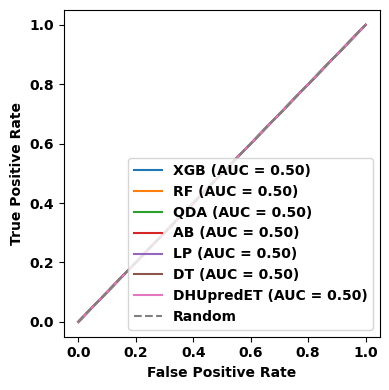

In [82]:
# 重新加载 ps2 测试文件（确保你已用真实特征覆盖了 base_dir/ps2_test.csv）
tdf9 = pd.read_csv(f"{base_dir}/ps2_test.csv")
tdf9 = ensure_target_column_inplace(tdf9)
X_test9 = tdf9.drop(columns=["Target"])
y_test9 = tdf9["Target"].astype(int)

# 用之前的 ExtraTrees 模型评估
et = ExtraTreesClassifier(
    n_estimators=300, random_state=10, max_features="sqrt",
    min_samples_split=4, min_samples_leaf=1, n_jobs=-1
)
et.fit(X_train9, y_train9)
y_pred9 = et.predict(X_test9)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
print("Confusion matrix:\n", confusion_matrix(y_test9, y_pred9))
print(classification_report(y_test9, y_pred9, digits=4))

# 若模型支持概率，计算 AUC/AUPR
if hasattr(et, "predict_proba"):
    y_score = et.predict_proba(X_test9)[:, 1]
    print("AUROC:", roc_auc_score(y_test9, y_score))
    print("AUPR:", average_precision_score(y_test9, y_score))

# 重新绘制 ROC（使用上一轮定义的 models 列表）
plot_roc_for_classifiers(models, X_train9, X_test9, y_train9, y_test9, out_png="w2vroc.png", figsize=(4,4), dpi=800)

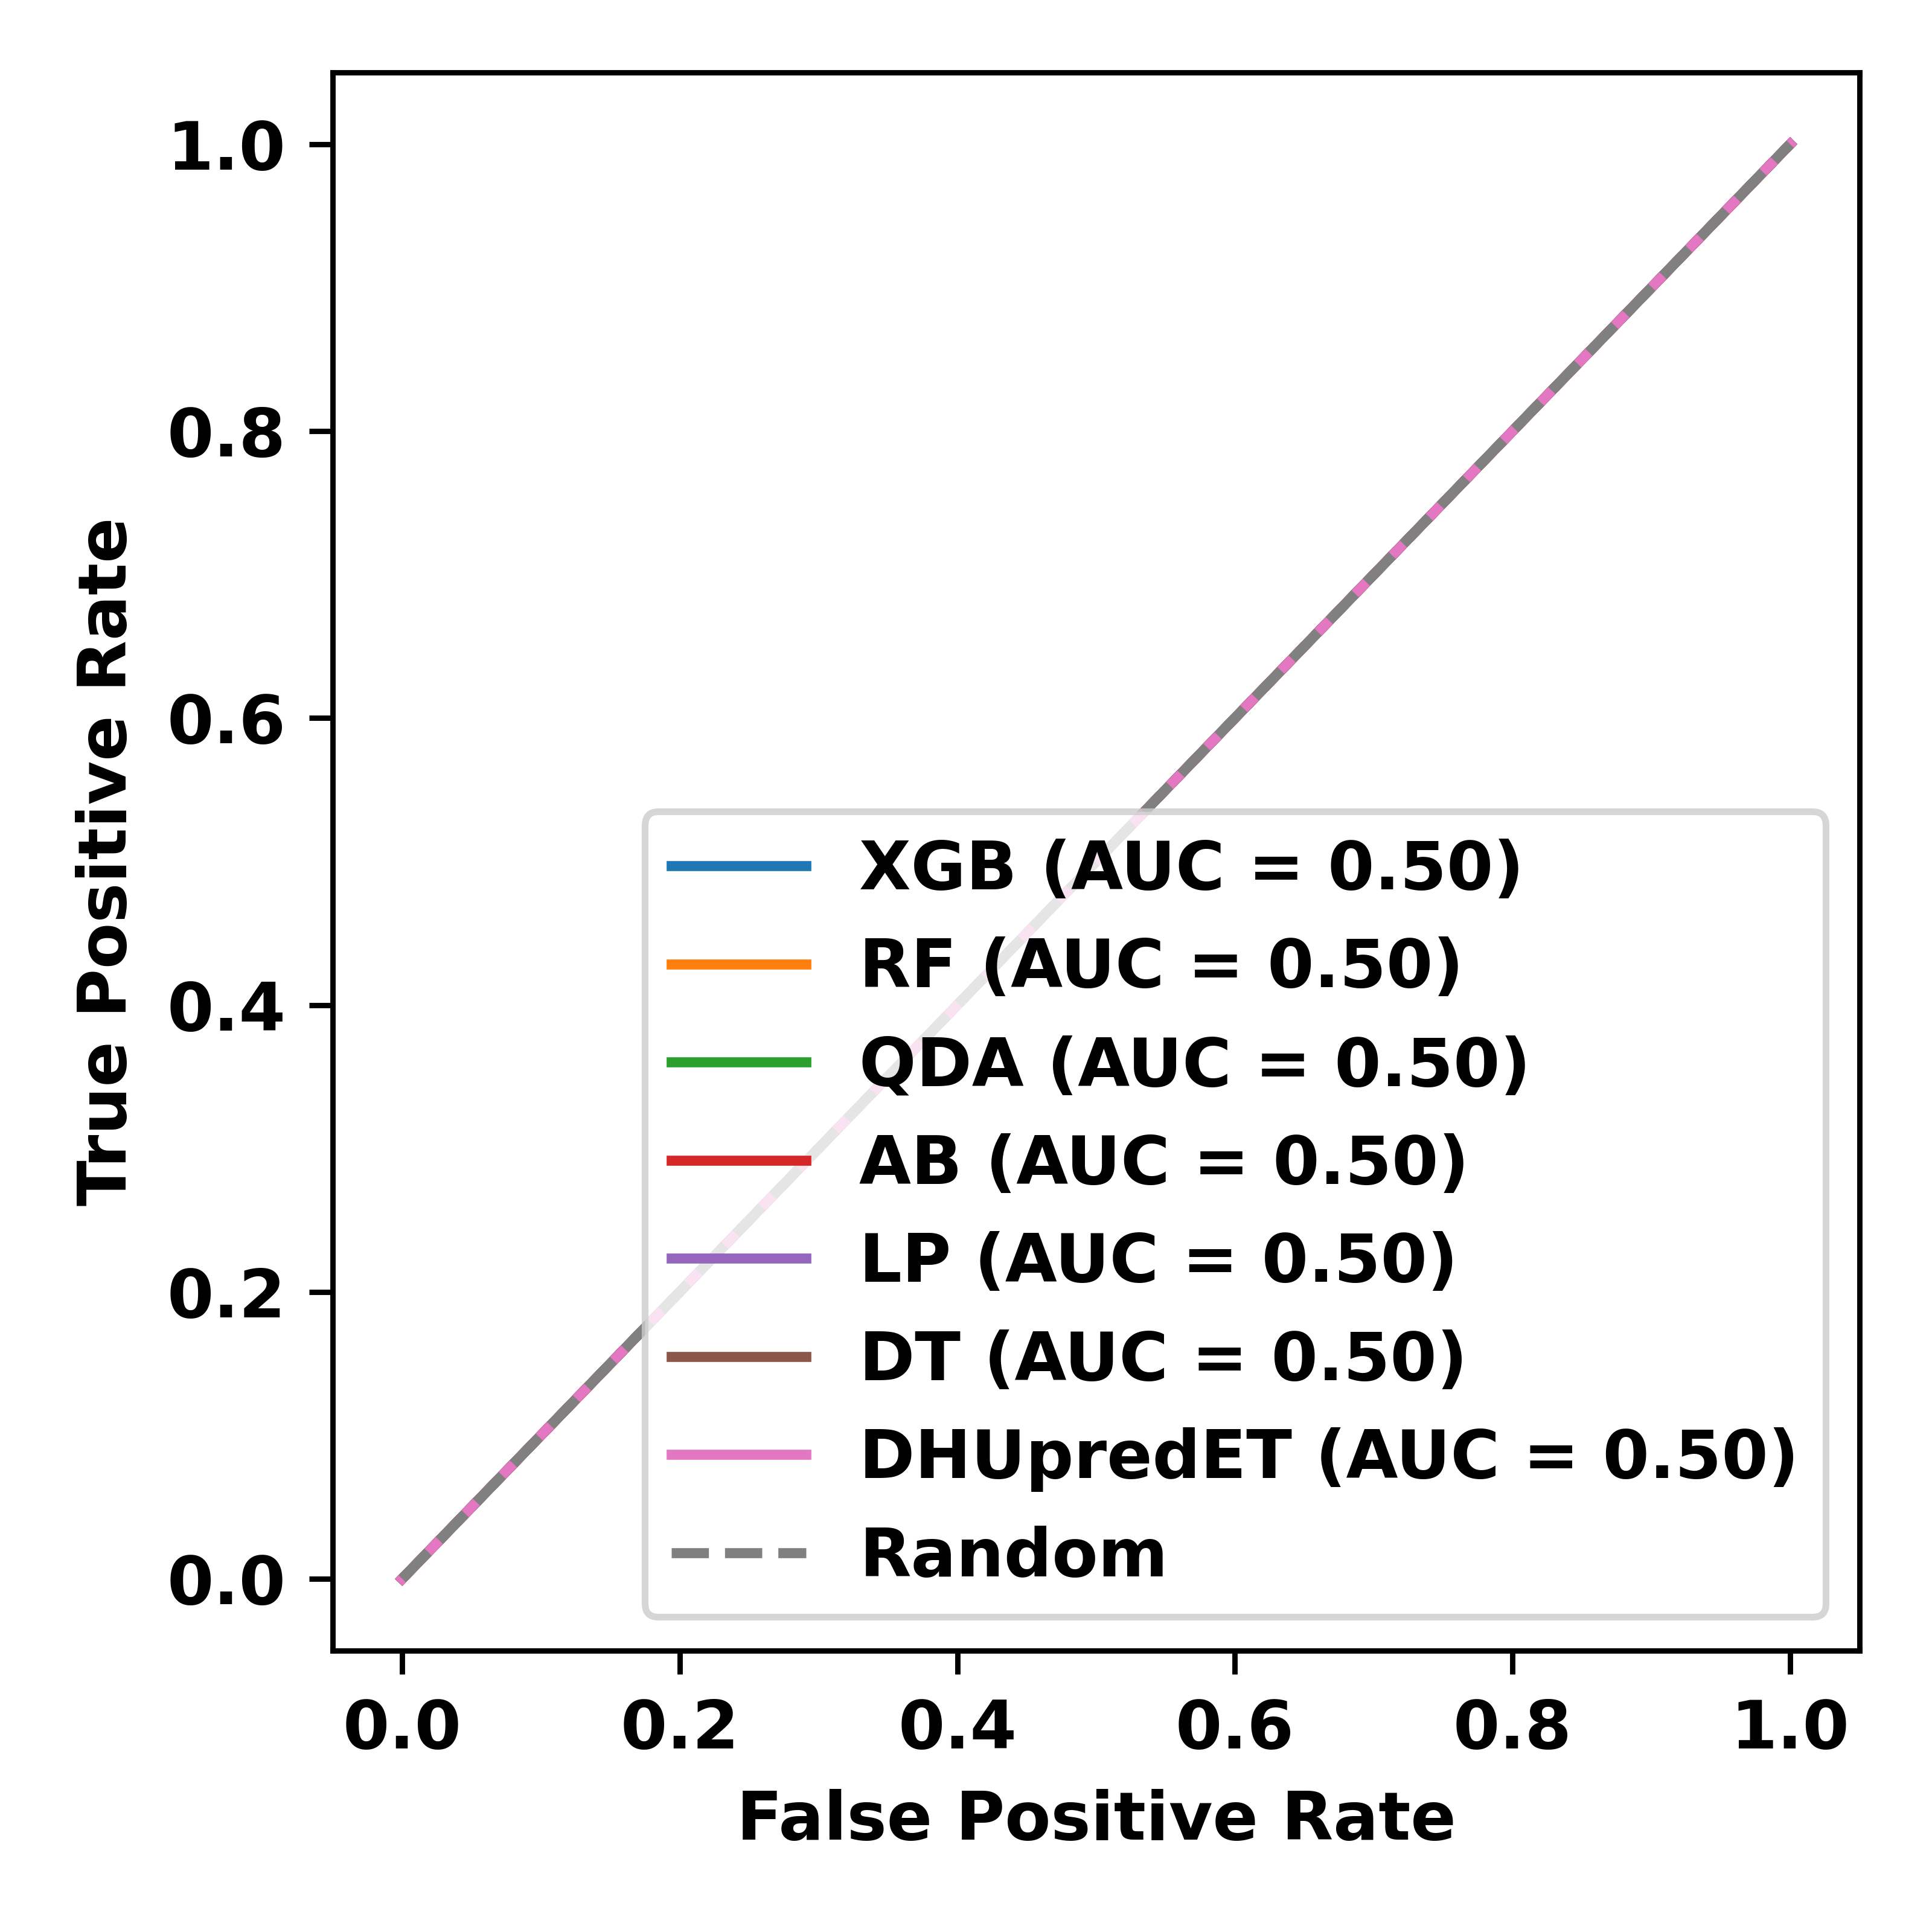

In [67]:
from IPython.display import Image, display
display(Image(filename=f"{base_dir}/w2vroc.png"))

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


AttributeError: This 'VotingClassifier' has no attribute 'predict_proba'

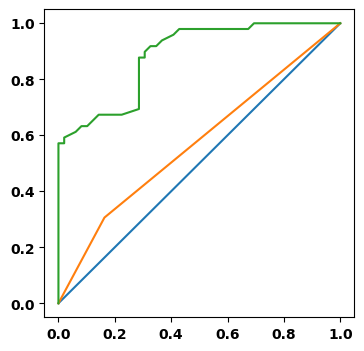

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a dataset and target variable
X = df9.drop('Target', axis=1)
y = df9['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
[rf,ada,dt,xgb,qda,dj,lp,ex]
classifiers = [
    ('XGB', xgb),
    ('QDA', qda),
    ('RF', rf),
    ('DJ', dj),
    ('AB', ada),
    ('LP', lp),
    ('DT', dt),
    ('DHUpredET', ex),
]

# Set default font properties to make text bold
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

plt.figure(figsize=(4, 4))

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


plt.savefig('w2vroc.png', dpi=1500)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables 

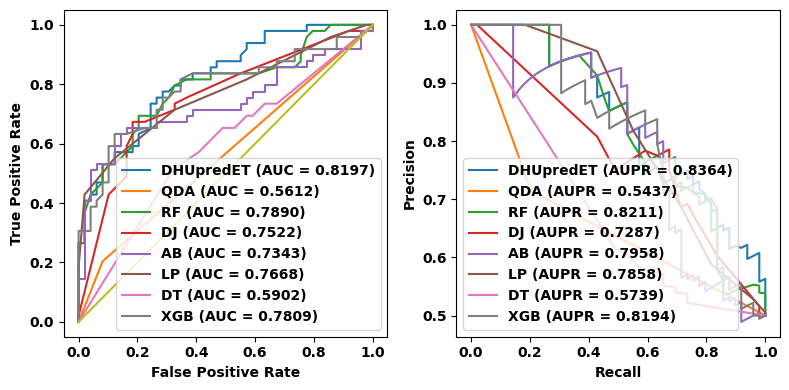

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Set default font properties to make text bold
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

# Assuming you have a dataset and target variable
X = df5.drop('Target', axis=1)
y = df5['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have classifiers defined elsewhere
classifiers = [
    ('DHUpredET', ex),
    ('QDA', qda),
    ('RF', rf),
    ('DJ', dj),
    ('AB', ada),
    ('LP', lp),
    ('DT', dt),
    ('XGB', xgb),
]

plt.figure(figsize=(8, 4))

# Plot ROC curve
plt.subplot(1, 2, 1)
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plot PR curve
plt.subplot(1, 2, 2)
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    aupr = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, label=f'{name} (AUPR = {aupr:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.savefig('roc_pr_curves.png', dpi=1500)
plt.show()
